# 📊 Dataset difficulty - Jupyter notebook

In [1]:
%load_ext autoreload
%autoreload 2

## Augmentation

standard transformation only creates new columens *sentence1* and *sentence 2* for standardization, null transformation pass empty strings to these variables

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("ctu-aic/csfever_v2","/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/", dataset_subset="original_nli").transform()
FEVERNullTransformation("ctu-aic/csfever_v2","/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/", dataset_subset="original_nli").transform()

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/generated","/home/mlynatom/data/dataset_difficulty/augmentation/generated/").transform()
FEVERNullTransformation("/home/mlynatom/data/generated","/home/mlynatom/data/dataset_difficulty/augmentation/generated/").transform()

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/generated_en","/home/mlynatom/data/dataset_difficulty/augmentation/generated_en/").transform()
FEVERNullTransformation("/home/mlynatom/data/generated_en","/home/mlynatom/data/dataset_difficulty/augmentation/generated_en/").transform()

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/generated_pl","/home/mlynatom/data/dataset_difficulty/augmentation/generated_pl/").transform()
FEVERNullTransformation("/home/mlynatom/data/generated_pl","/home/mlynatom/data/dataset_difficulty/augmentation/generated_pl/").transform()

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/generated_sk","/home/mlynatom/data/dataset_difficulty/augmentation/generated_sk/").transform()
FEVERNullTransformation("/home/mlynatom/data/generated_sk","/home/mlynatom/data/dataset_difficulty/augmentation/generated_sk/").transform()

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/generated_cs_en_pl_sk","/home/mlynatom/data/dataset_difficulty/augmentation/generated_cs_en_pl_sk").transform()
FEVERNullTransformation("/home/mlynatom/data/generated_cs_en_pl_sk","/home/mlynatom/data/dataset_difficulty/augmentation/generated_cs_en_pl_sk").transform()

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/generated_sum_cs_en_pl_sk","/home/mlynatom/data/dataset_difficulty/augmentation/generated_sum_cs_en_pl_sk").transform()
FEVERNullTransformation("/home/mlynatom/data/generated_sum_cs_en_pl_sk","/home/mlynatom/data/dataset_difficulty/augmentation/generated_sum_cs_en_pl_sk").transform()

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/csfever_switched_labels","/home/mlynatom/data/dataset_difficulty/augmentation/csfever").transform()
FEVERNullTransformation("/home/mlynatom/data/csfever_switched_labels","/home/mlynatom/data/dataset_difficulty/augmentation/csfever").transform()

In [1]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("/home/mlynatom/data/enfever_switched_labels","/home/mlynatom/data/dataset_difficulty/augmentation/enfever").transform()
FEVERNullTransformation("/home/mlynatom/data/enfever_switched_labels","/home/mlynatom/data/dataset_difficulty/augmentation/enfever").transform()

2023-10-06 09:49:58.452058: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-06 09:49:58.452134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a06): /proc/driver/nvidia/version does not exist


Creating CSV from Arrow format:   0%|          | 0/209 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/209 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

## Train Models

Do using other finetuning scripts

## Estimate V-usable Info

In [1]:
from dataset_difficulty.v_info import v_info, v_entropy
import pandas as pd

DATASET_PATH = "/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/"
SPLITS = ["train", 
          "dev", 
          "test"
          ]

def v_info2(data_fn, model, null_data_fn, null_model, tokenizer, out_fn="", input_key='sentence1', input_key2='sentence2', use_lora:bool = False):
    """
    Calculate the V-entropy, conditional V-entropy, and V-information on the
    data in data_fn. Add these columns to the data in data_fn and return as a 
    pandas DataFrame. This means that each row will contain the (pointwise
    V-entropy, pointwise conditional V-entropy, and pointwise V-info (PVI)). By
    taking the average over all the rows, you can get the V-entropy, conditional
    V-entropy, and V-info respectively.

    Args:
        data_fn: path to data; should contain the label in the 'label' column 
            and X in column specified by input_key
        model: path to saved model or model name in HuggingFace library
        null_data_fn: path to null data (column specified by input_key should have
            null data)
        null_model: path to saved model trained on null data
        tokenizer: path to tokenizer or tokenizer name in HuggingFace library
        out_fn: where to save
        input_key: column name of X variable in data_fn 

    Returns:
        Pandas DataFrame of the data in data_fn, with the three additional 
        columns specified above.
    """
    data = pd.read_csv(data_fn)
    data['H_yx'], data['correct_yx'], data['predicted_label'], data['predicted_score'] = v_entropy(data_fn, model, tokenizer, input_key=input_key, input_key2=input_key2, use_lora=False)
    data['H_yb'], _, _, _ = v_entropy(null_data_fn, null_model, tokenizer, input_key=input_key, input_key2=input_key2, use_lora=use_lora)
    data['PVI'] = data['H_yb'] - data['H_yx']

    if out_fn:
        data.to_csv(out_fn)

    return data

for split in SPLITS:
       v_info2(data_fn=f"{DATASET_PATH}fever_{split}_std.csv", 
              model="/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4-steps3000/checkpoint-30000", 
              null_data_fn=f"{DATASET_PATH}fever_{split}_null.csv",
              null_model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-csfever_v2_null-original_nli-r8-alpha16_bias-none",
              tokenizer="ctu-aic/xlm-roberta-large-squad2-csfever_v2-f1",
              out_fn=f"/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_full_{split}.csv",
              input_key="sentence1",
              input_key2="sentence2",
              use_lora=True)

  1%|          | 10/1190 [00:42<1:19:00,  4.02s/it]/home/mlynatom/venvs/py3.9.6/lib/python3.9/site-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
 25%|██▌       | 299/1190 [20:49<57:23,  3.86s/it]  

In [ ]:
from dataset_difficulty.v_info import v_info

DATASET_PATH = "/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/"
SPLITS = ["train", 
          "dev", 
          #"test"
          ]

for split in SPLITS:
       v_info(data_fn=f"{DATASET_PATH}fever_{split}_std.csv", 
              model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-csfever_v2-original_nli-r8-alpha16_bias-none", 
              null_data_fn=f"{DATASET_PATH}fever_{split}_null.csv",
              null_model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-csfever_v2_null-original_nli-r8-alpha16_bias-none",
              tokenizer="ctu-aic/xlm-roberta-large-squad2-csfever_v2-f1",
              out_fn=f"/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_{split}.csv",
              input_key="sentence1",
              input_key2="sentence2",
              use_lora=True)

In [2]:
from dataset_difficulty.v_info import v_info

DATASET_PATH = "/home/mlynatom/data/dataset_difficulty/augmentation/generated/"
SPLITS = [#"train", 
          "dev", 
          #"test"
          ]

for split in SPLITS:
       v_info(data_fn=f"{DATASET_PATH}fever_{split}_std.csv", 
              model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-generated-r8-alpha16_bias-none", 
              null_data_fn=f"{DATASET_PATH}fever_{split}_null.csv",
              null_model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-generated_null-r8-alpha16_bias-none",
              tokenizer="ctu-aic/xlm-roberta-large-squad2-csfever_v2-f1",
              out_fn=f"/home/mlynatom/data/dataset_difficulty/PVI/generated_{split}.csv",
              input_key="sentence1",
              input_key2="sentence2",
              use_lora=True)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at deepset/xlm-roberta-large-squad2 and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  3%|▎         | 10/301 [00:15<07:10,  1.48s/it]/home/mlynatom/venvs/py3.9.6/lib/python3.9/site-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 301/301 [07:29<00:00,  1.49s/it]
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at deepset/xlm-roberta-large-squad2 and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should p

## PVI Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import textwrap
from typing import List, Optional

In [21]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_test.csv")

In [3]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_test.csv")

In [12]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_en_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_en_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_en_test.csv")

In [32]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_pl_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_pl_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_pl_test.csv")

In [21]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_sk_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_sk_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_sk_test.csv")

In [3]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_cs_en_pl_sk_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_cs_en_pl_sk_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_cs_en_pl_sk_test.csv")

In [17]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_sum_cs_en_pl_sk_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_sum_cs_en_pl_sk_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/generated_sum_cs_en_pl_sk_test.csv")

In [29]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_test.csv")

In [41]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/enfever_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/enfever_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/enfever_test.csv")

In [28]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_full_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_full_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_full_test.csv")

In [4]:
# for first analysing part
#data = test_data
data = train_data
#data = dev_data

In [57]:
train_data["sentence2"] = train_data.apply(lambda x: textwrap.fill(x.sentence2[:1024], width=100).replace("\n", "<br>"), axis=1)
dev_data["sentence2"] = dev_data.apply(lambda x: textwrap.fill(x.sentence2[:1024], width=100).replace("\n", "<br>"), axis=1)
test_data["sentence2"] = test_data.apply(lambda x: textwrap.fill(x.sentence2[:1024], width=100).replace("\n", "<br>"), axis=1)

### Compute score_null

In [8]:
train_data["score_null"] = train_data.apply(lambda x: 2**(-(x.H_yb)), axis=1)

In [13]:
np.unique(train_data["label"].to_numpy(), return_counts=True)

(array([0, 1, 2]), array([60661, 22650, 35639]))

In [3]:
train_data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,Dr. Milan Uhde mluvil s studenty na řečkovické...,Gymnázium Brno-Řečkovice Druhým tradičním způ...,2,Dr. Milan Uhde mluvil s studenty na řečkovické...,Gymnázium Brno-Řečkovice Druhým tradičním způ...,1.482131,0.000152,True,2,0.999895,1.481979
1,1,Richard Biegel se narodil v Praze.,Richard Biegel Od roku 1996 se věnuje aktivní...,2,Richard Biegel se narodil v Praze.,Richard Biegel Od roku 1996 se věnuje aktivní...,1.482131,0.000265,True,2,0.999816,1.481866
2,2,Izaiáš byl vězněn uvnitř Novosadské synagogy.,Novosadská synagoga Novosadská synagoga je v ...,1,Izaiáš byl vězněn uvnitř Novosadské synagogy.,Novosadská synagoga Novosadská synagoga je v ...,1.741473,0.001542,True,1,0.998932,1.739931
3,3,Oficiální název Guamu je Guåhån.,Guam Možná hledáte: GUAM – mezinárodní organi...,1,Oficiální název Guamu je Guåhån.,Guam Možná hledáte: GUAM – mezinárodní organi...,1.741473,0.032056,True,1,0.978026,1.709418
4,4,Svatý otec navštívil Kubu v březnu 2012.,Rakouská iniciativa kněží Ve Výzvě např. proh...,0,Svatý otec navštívil Kubu v březnu 2012.,Rakouská iniciativa kněží Ve Výzvě např. proh...,1.543819,0.018859,True,0,0.987013,1.524961
...,...,...,...,...,...,...,...,...,...,...,...,...
295204,295204,Rok 1913 začal středou.,"1913 1913 (MCMXIII) byl rok, který dle gregor...",0,Rok 1913 začal středou.,"1913 1913 (MCMXIII) byl rok, který dle gregor...",1.543819,0.027178,True,0,0.981338,1.516642
295205,295205,Občina Kanal ob Soči se nachází v gorickém reg...,Občina Kanal ob Soči Občina Kanal ob Soči (v ...,0,Občina Kanal ob Soči se nachází v gorickém reg...,Občina Kanal ob Soči Občina Kanal ob Soči (v ...,1.543819,0.017373,True,0,0.988030,1.526447
295206,295206,Linton spolupracoval s Rodertem Redfieldem na ...,Ralph Linton Ralph Linton (27. února 1893 Fil...,2,Linton spolupracoval s Rodertem Redfieldem na ...,Ralph Linton Ralph Linton (27. února 1893 Fil...,1.482131,0.000153,True,2,0.999894,1.481978
295207,295207,Dům čp. 325 se nachází v okrese Nový Jičín.,Dům čp. 325 (Štramberk) Stavební podoba. Dům...,2,Dům čp. 325 se nachází v okrese Nový Jičín.,Dům čp. 325 (Štramberk) Stavební podoba. Dům...,1.482131,0.006951,True,2,0.995193,1.475180


### Analyse

In [5]:
data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,Dr. Milan Uhde mluvil s studenty na řečkovické...,Gymnázium Brno-Řečkovice Druhým tradičním způ...,2,Dr. Milan Uhde mluvil s studenty na řečkovické...,Gymnázium Brno-Řečkovice Druhým tradičním způ...,1.482131,0.000152,True,2,0.999895,1.481979
1,1,Richard Biegel se narodil v Praze.,Richard Biegel Od roku 1996 se věnuje aktivní...,2,Richard Biegel se narodil v Praze.,Richard Biegel Od roku 1996 se věnuje aktivní...,1.482131,0.000265,True,2,0.999816,1.481866
2,2,Izaiáš byl vězněn uvnitř Novosadské synagogy.,Novosadská synagoga Novosadská synagoga je v ...,1,Izaiáš byl vězněn uvnitř Novosadské synagogy.,Novosadská synagoga Novosadská synagoga je v ...,1.741473,0.001542,True,1,0.998932,1.739931
3,3,Oficiální název Guamu je Guåhån.,Guam Možná hledáte: GUAM – mezinárodní organi...,1,Oficiální název Guamu je Guåhån.,Guam Možná hledáte: GUAM – mezinárodní organi...,1.741473,0.032056,True,1,0.978026,1.709418
4,4,Svatý otec navštívil Kubu v březnu 2012.,Rakouská iniciativa kněží Ve Výzvě např. proh...,0,Svatý otec navštívil Kubu v březnu 2012.,Rakouská iniciativa kněží Ve Výzvě např. proh...,1.543819,0.018859,True,0,0.987013,1.524961
...,...,...,...,...,...,...,...,...,...,...,...,...
295204,295204,Rok 1913 začal středou.,"1913 1913 (MCMXIII) byl rok, který dle gregor...",0,Rok 1913 začal středou.,"1913 1913 (MCMXIII) byl rok, který dle gregor...",1.543819,0.027178,True,0,0.981338,1.516642
295205,295205,Občina Kanal ob Soči se nachází v gorickém reg...,Občina Kanal ob Soči Občina Kanal ob Soči (v ...,0,Občina Kanal ob Soči se nachází v gorickém reg...,Občina Kanal ob Soči Občina Kanal ob Soči (v ...,1.543819,0.017373,True,0,0.988030,1.526447
295206,295206,Linton spolupracoval s Rodertem Redfieldem na ...,Ralph Linton Ralph Linton (27. února 1893 Fil...,2,Linton spolupracoval s Rodertem Redfieldem na ...,Ralph Linton Ralph Linton (27. února 1893 Fil...,1.482131,0.000153,True,2,0.999894,1.481978
295207,295207,Dům čp. 325 se nachází v okrese Nový Jičín.,Dům čp. 325 (Štramberk) Stavební podoba. Dům...,2,Dům čp. 325 se nachází v okrese Nový Jičín.,Dům čp. 325 (Štramberk) Stavební podoba. Dům...,1.482131,0.006951,True,2,0.995193,1.475180


In [6]:
sorted_data = data.sort_values(by="PVI", ascending=True)

In [7]:
sorted_data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
43008,43008,Dalším termínem pro americký kmen je Charlesto...,"Seznam indiánských kmenů Střední Amerika, Mex...",1,Dalším termínem pro americký kmen je Charlesto...,"Seznam indiánských kmenů Střední Amerika, Mex...",1.741473,14.742071,False,2,0.999875,-13.000597
252604,252604,Za výkon rozhodnutí byli odpovědní sborníci.,Soud pro veřejnou službu Soud pro veřejnou sl...,1,Za výkon rozhodnutí byli odpovědní sborníci.,Soud pro veřejnou službu Soud pro veřejnou sl...,1.741473,14.229491,False,2,0.999831,-12.488018
152911,152911,Marie Elekta od Ježíše byla svědkem katolické ...,Marie Elekta od Ježíše Tři roky po její smrti...,1,Marie Elekta od Ježíše byla svědkem katolické ...,Marie Elekta od Ježíše Tři roky po její smrti...,1.741473,14.165221,False,2,0.999813,-12.423748
245131,245131,Marie Elekta byla svědkyní katolické církve.,Marie Elekta od Ježíše Tři roky po její smrti...,1,Marie Elekta byla svědkyní katolické církve.,Marie Elekta od Ježíše Tři roky po její smrti...,1.741473,14.152996,False,2,0.999802,-12.411523
258482,258482,Alois Schönburg-Hartenstein byl prvním potomke...,Alois Schönburg-Hartenstein Manželství a poto...,1,Alois Schönburg-Hartenstein byl prvním potomke...,Alois Schönburg-Hartenstein Manželství a poto...,1.741473,14.084305,False,2,0.999775,-12.342831
...,...,...,...,...,...,...,...,...,...,...,...,...
205503,205503,Utrpení Krista bylo natočeno 1. květen 1962.,Maia Morgensternová Maia Morgensternová (* 1....,1,Utrpení Krista bylo natočeno 1. květen 1962.,Maia Morgensternová Maia Morgensternová (* 1....,1.741473,0.001334,True,1,0.999076,1.740139
95217,95217,Gwilym Prichard získal stříbrnou medaili na Ro...,"Gwilym Prichard Gwilym Prichard, původně Prit...",1,Gwilym Prichard získal stříbrnou medaili na Ro...,"Gwilym Prichard Gwilym Prichard, původně Prit...",1.741473,0.001334,True,1,0.999076,1.740139
133286,133286,Počet zástupců předsedy byl 8. února 2005 sníž...,Fórum pro Jednotnou Abcházii Fórum pro Jednot...,1,Počet zástupců předsedy byl 8. února 2005 sníž...,Fórum pro Jednotnou Abcházii Fórum pro Jednot...,1.741473,0.001331,True,1,0.999078,1.740142
187670,187670,Po představení zpívalo proletářské publikum KPD.,Erwin Piscator Tvorba. Jeho obohacení divade...,1,Po představení zpívalo proletářské publikum KPD.,Erwin Piscator Tvorba. Jeho obohacení divade...,1.741473,0.001331,True,1,0.999078,1.740142


In [8]:
filtered_data=sorted_data[(sorted_data["correct_yx"])& (sorted_data["PVI"] < 0)]

In [9]:
filtered_data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI


In [15]:
filtered_data2=sorted_data[(sorted_data["correct_yx"] != True) & (sorted_data["PVI"] > 0)]

In [10]:
filtered_data2

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
85455,85455,95852,1,První žena Wyatta Earpa se narodila krátce pře...,Wyatt Earp. Wyatt Berry Stapp Earp (19. března...,První žena Wyatta Earpa se narodila krátce pře...,Wyatt Earp. Wyatt Berry Stapp Earp (19. března...,2.620849,2.620357,False,0,0.801341,0.000492
68511,68511,202224,2,Ve Vraždě v Orient expresu hrála slavná americ...,"Vražda v Orient expresu (film, 1974). Vražda v...",Ve Vraždě v Orient expresu hrála slavná americ...,"Vražda v Orient expresu (film, 1974). Vražda v...",1.603840,1.603233,False,0,0.650918,0.000607
22243,22243,5145,2,Alan Rickman byl anglický producent.,"Alan Rickman. Alan Rickman, celým jménem Alan ...",Alan Rickman byl anglický producent.,"Alan Rickman. Alan Rickman, celým jménem Alan ...",1.603840,1.602357,False,0,0.593452,0.001483
32530,32530,112006,1,Kapustňáci jsou rychlí požírači rostlin.,"Kapustňák. Kapustňák (""Trichechus"") je jediný ...",Kapustňáci jsou rychlí požírači rostlin.,"Kapustňák. Kapustňák (""Trichechus"") je jediný ...",2.620849,2.618314,False,0,0.750144,0.002535
42535,42535,103508,2,Michelle Williamsová hrála v King Kongovi.,"King Kong (film, 1933). King Kong je černobílý...",Michelle Williamsová hrála v King Kongovi.,"King Kong (film, 1933). King Kong je černobílý...",1.603840,1.601051,False,0,0.634710,0.002788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59762,59762,94426,1,Spojené státy mají 200 milionů obyvatel.,Spojené státy americké. Spojené státy americké...,Spojené státy mají 200 milionů obyvatel.,Spojené státy americké. Spojené státy americké...,2.620849,1.023803,False,0,0.492161,1.597047
50482,50482,36683,1,William Jennings Bryan je z Indiany.,William Jennings Bryan. William Jennings Bryan...,William Jennings Bryan je z Indiany.,William Jennings Bryan. William Jennings Bryan...,2.620849,1.020056,False,2,0.495227,1.600794
16186,16186,155308,1,Usherovo jídlo pro druháky je My Way.,"Usher. Usher Raymond IV., spíše známý jako Ush...",Usherovo jídlo pro druháky je My Way.,"Usher. Usher Raymond IV., spíše známý jako Ush...",2.620849,1.019688,False,2,0.499308,1.601161
72385,72385,81688,1,Berlín je země.,"Berlín. Berlín (německy ""Berlin"") je hlavní a ...",Berlín je země.,"Berlín. Berlín (německy ""Berlin"") je hlavní a ...",2.620849,1.018752,False,0,0.499631,1.602097


In [10]:
filtered_data3=sorted_data[(sorted_data["PVI"] > -1) & (sorted_data["PVI"] < 1)]

In [11]:
filtered_data3

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
258724,258724,V Čechách byly limity těžby hnědého uhlí.,Územní limity těžby hnědého uhlí na Sokolovsku...,0,V Čechách byly limity těžby hnědého uhlí.,Územní limity těžby hnědého uhlí na Sokolovsku...,1.543819,2.543541,False,1,0.808338,-0.999721
223488,223488,Název mistrovství Československa v atletice v ...,Mistrovství Československa v atletice 1972 Mi...,1,Název mistrovství Československa v atletice v ...,Mistrovství Československa v atletice 1972 Mi...,1.741473,2.741156,False,0,0.819715,-0.999683
23102,23102,Aristoteles byl autorem sylogismu.,Predikátová logika Dále existuje predikátová ...,1,Aristoteles byl autorem sylogismu.,Predikátová logika Dále existuje predikátová ...,1.741473,2.741137,False,0,0.804796,-0.999664
2441,2441,Aristoteles byl autorem sylogismu.,Predikátová logika Dále existuje predikátová ...,1,Aristoteles byl autorem sylogismu.,Predikátová logika Dále existuje predikátová ...,1.741473,2.741137,False,0,0.804796,-0.999664
177487,177487,Oksana Bajul je historicky první olympijskou v...,"Oksana Bajulová Oksana Bajul, ukrajinsky ""Окс...",1,Oksana Bajul je historicky první olympijskou v...,"Oksana Bajulová Oksana Bajul, ukrajinsky ""Окс...",1.741473,2.740946,False,0,0.824437,-0.999473
...,...,...,...,...,...,...,...,...,...,...,...,...
136271,136271,Jiří Zamazal hrál za tým Zbrojovky Brno.,Jiří Zamazal Jiří Zamazal (* 11. května 1959)...,1,Jiří Zamazal hrál za tým Zbrojovky Brno.,Jiří Zamazal Jiří Zamazal (* 11. května 1959)...,1.741473,0.741655,True,1,0.598053,0.999818
141605,141605,Úvodní zápasy se konaly 4. července.,Liga mistrů UEFA 2012/2013 1. předkolo. Los ...,0,Úvodní zápasy se konaly 4. července.,Liga mistrů UEFA 2012/2013 1. předkolo. Los ...,1.543819,0.543931,True,0,0.685899,0.999888
152603,152603,Zmije růžkatá žije na Blízkém východě.,"Zmije růžkatá |doména=}} = Zmije růžkatá (""V...",0,Zmije růžkatá žije na Blízkém východě.,"Zmije růžkatá |doména=}} = Zmije růžkatá (""V...",1.543819,0.543915,True,0,0.685907,0.999904
252976,252976,V Dánsku se nacházejí hrobky a dolmeny z obdob...,Dějiny Dánska Prehistorické Dánsko. Lidé žil...,0,V Dánsku se nacházejí hrobky a dolmeny z obdob...,Dějiny Dánska Prehistorické Dánsko. Lidé žil...,1.543819,0.543914,True,0,0.685907,0.999905


### Plot PVI value vs True/False prediction

In [4]:
def plot_scatter(x, y, to_colours=None, colours=None, figsize=(5,5), dpi=2400):
    plt.figure(dpi=dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    colors = {True:'green', False:'red'}

    if to_colours is not None:
        ax.scatter(x, y, c=to_colours.map(colors))
    elif colours is not None:
        ax.scatter(x,y,c=colours)
    else:
        ax.scatter(x,y)

    plt.show()

In [5]:
def plot_hist(x, figsize=(20,5)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    ax.hist(x, bins=100, weights=np.ones(len(x)) / len(x))
    plt.axvline(x.mean(), color="k", linestyle="dashed", linewidth=1)
    plt.show()

In [6]:
def plot_scatter_px(df, x,y, to_colours=None, colours=None, hover_name:str="id", hover_data:List[str]=["sentence1", "label", "predicted_label"], symbol: Optional[str]=None):
    colors = {True:'green', False:'red'}

    if to_colours is not None:
        fig = px.scatter(data_frame=df, x=x, y=y, color=map(lambda x: colors[x],to_colours), hover_data=hover_data, hover_name=hover_name, symbol=symbol)
    elif colours is not None:
        fig = px.scatter(data_frame=df, x=x, y=y,color=colours, hover_data=hover_data, hover_name=hover_name, symbol=symbol)
    else:
        fig = px.scatter(data_frame=df, x=x, y=y, hover_data=hover_data, hover_name=hover_name, symbol=symbol)
    
    return fig

train

<Figure size 15360x11520 with 0 Axes>

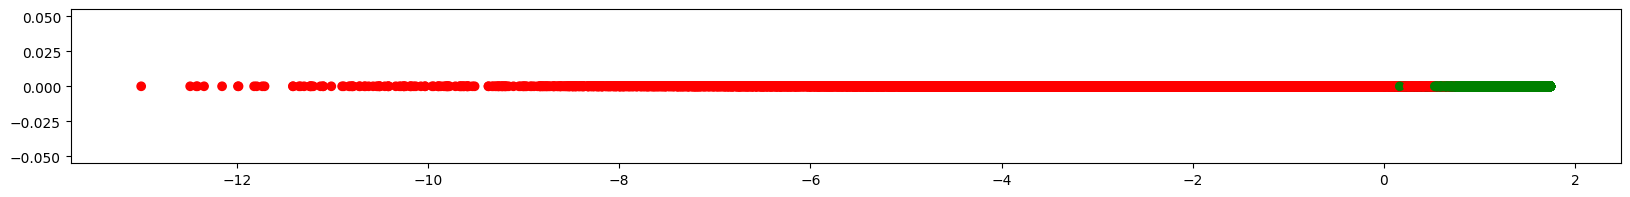

In [15]:
plot_scatter(x=data["PVI"], y=np.zeros_like(data["PVI"]), to_colours=data["correct_yx"], figsize=(20,2))

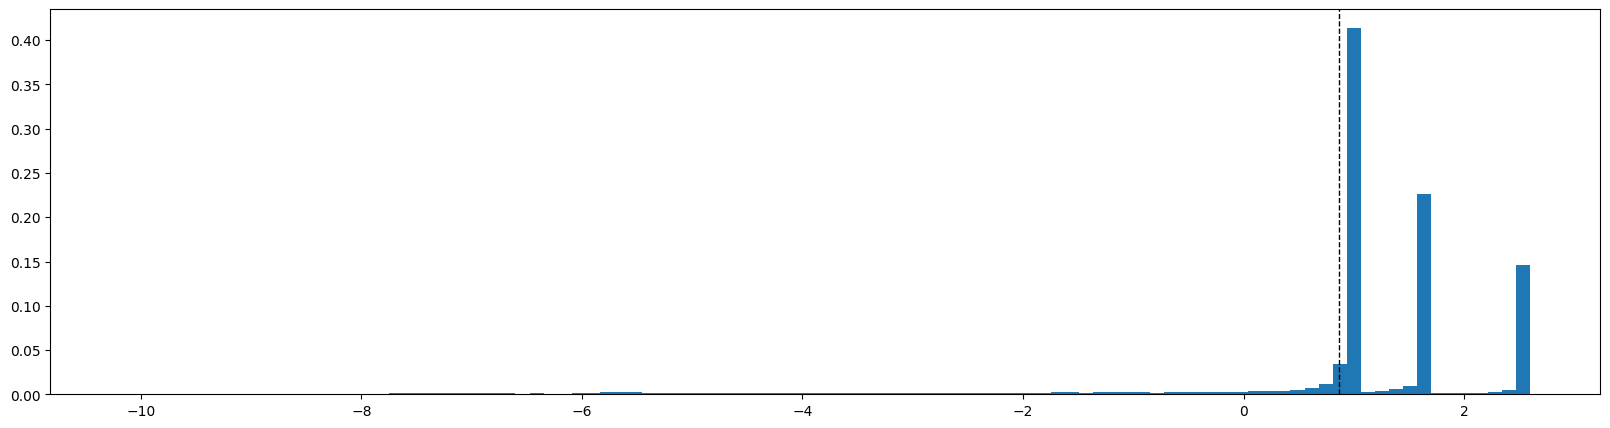

In [15]:
plot_hist(train_data["PVI"])

In [ ]:
plot_scatter_px(df=data, x="PVI", y=np.zeros_like(data["PVI"]))

<Figure size 14400x9600 with 0 Axes>

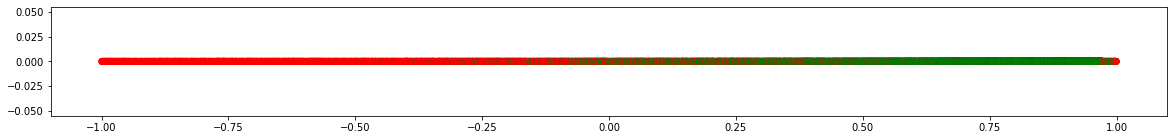

In [17]:
plot_scatter(x=filtered_data3["PVI"], y=np.zeros_like(filtered_data3["PVI"]), to_colours=filtered_data3["correct_yx"], figsize=(20,2))

In [20]:
plot_scatter_px(df=filtered_data3, x="PVI", y=np.zeros_like(filtered_data3["PVI"]), colours="correct_yx")

dev

<Figure size 15360x11520 with 0 Axes>

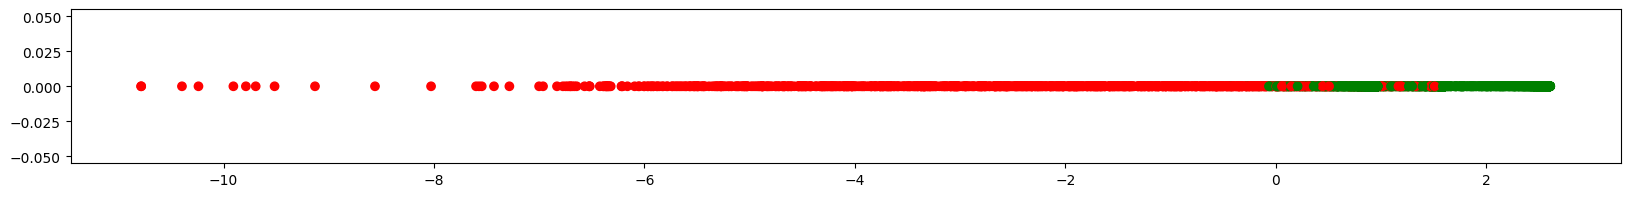

In [17]:
plot_scatter(x=data["PVI"], y=np.zeros_like(data["PVI"]), to_colours=data["correct_yx"], figsize=(20,2))

<Figure size 15360x11520 with 0 Axes>

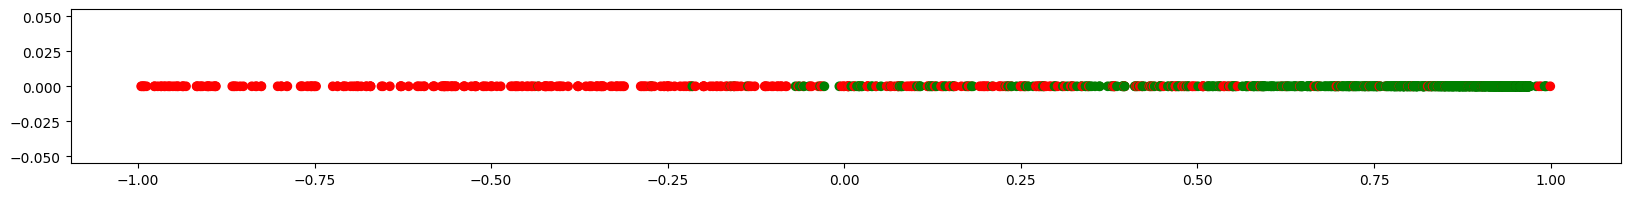

In [19]:
plot_scatter(x=filtered_data3["PVI"], y=np.zeros_like(filtered_data3["PVI"]), to_colours=filtered_data3["correct_yx"], figsize=(20,2))

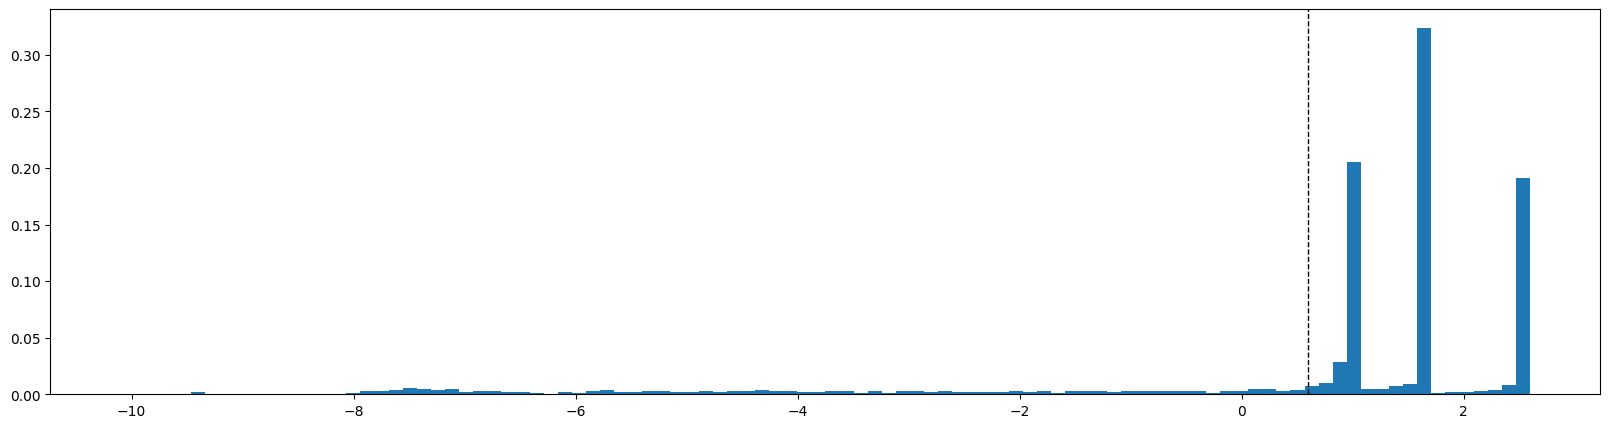

In [16]:
plot_hist(dev_data["PVI"])

test

<Figure size 15360x11520 with 0 Axes>

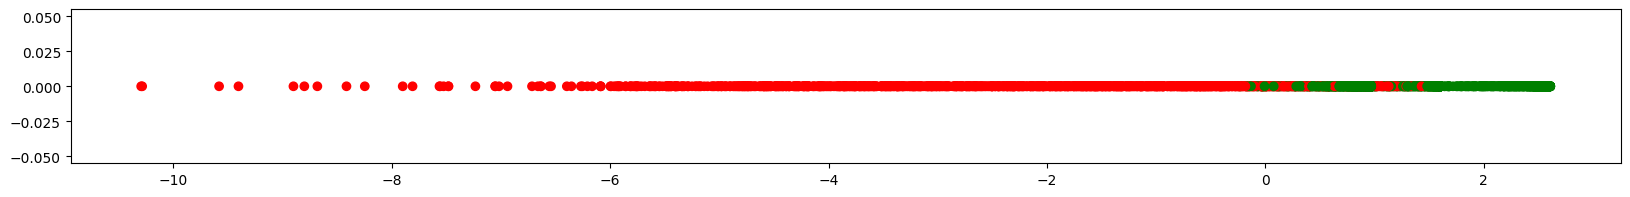

In [23]:
plot_scatter(x=data["PVI"], y=np.zeros_like(data["PVI"]), to_colours=data["correct_yx"], figsize=(20,2))

<Figure size 15360x11520 with 0 Axes>

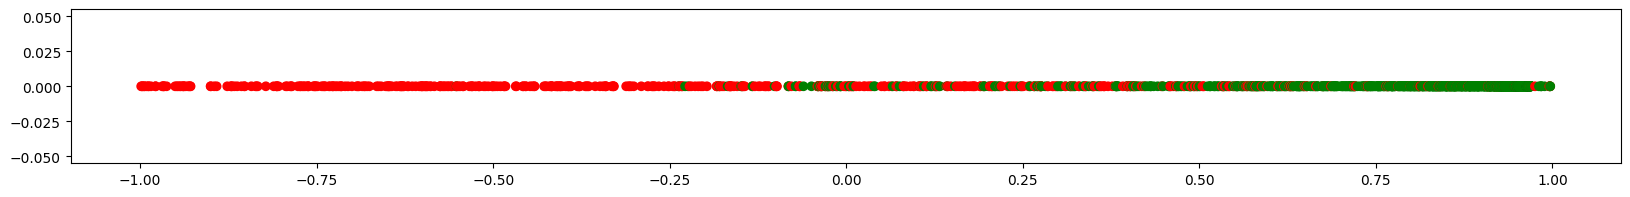

In [24]:
plot_scatter(x=filtered_data3["PVI"], y=np.zeros_like(filtered_data3["PVI"]), to_colours=filtered_data3["correct_yx"], figsize=(20,2))

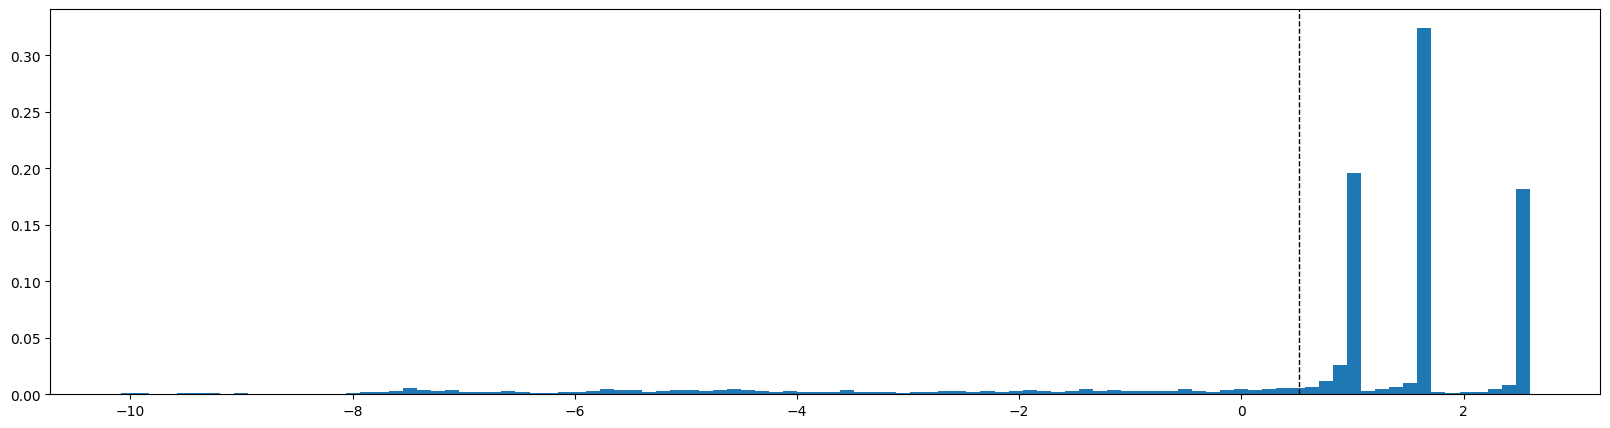

In [17]:
plot_hist(test_data["PVI"])

### Plot Dependency of PVI on predicted score + correlation

In [18]:
def compute_correlation(x, y, method='pearson'):
    return x.corr(y, method=method)

train

In [19]:
compute_correlation(train_data["PVI"], train_data["predicted_score"])

0.2866612284362931

<Figure size 15360x11520 with 0 Axes>

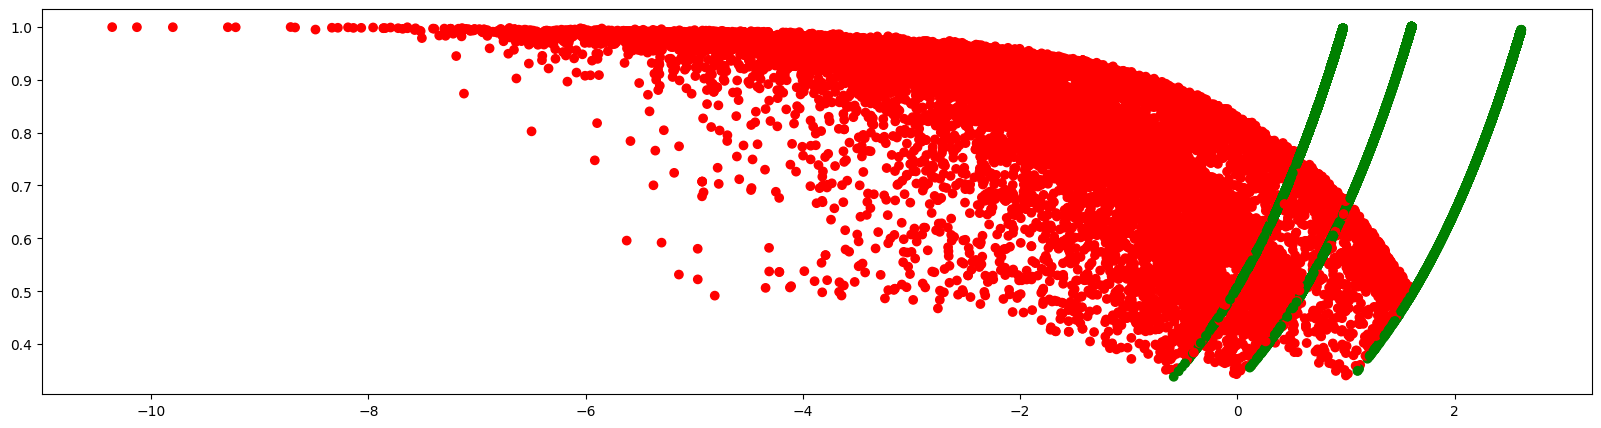

In [24]:
plot_scatter(train_data["PVI"], train_data["predicted_score"], to_colours=train_data['correct_yx'], figsize=(20,5))

<Figure size 15360x11520 with 0 Axes>

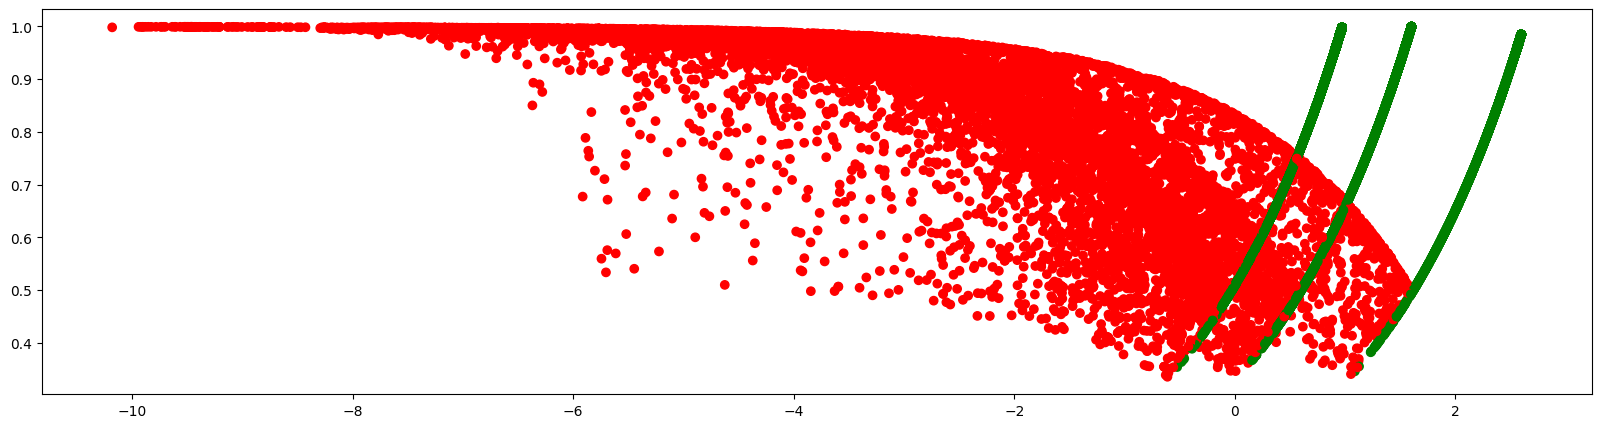

In [18]:
plot_scatter(train_data["PVI"], train_data["predicted_score"], to_colours=train_data['correct_yx'], figsize=(20,5))

In [ ]:
#too big for an interactive plot -> causes lags
plot_scatter_px(train_data, "PVI", "predicted_score", colours="correct_yx")

dev

In [21]:
compute_correlation(dev_data["PVI"], dev_data["predicted_score"])

0.25973459938179344

<Figure size 15360x11520 with 0 Axes>

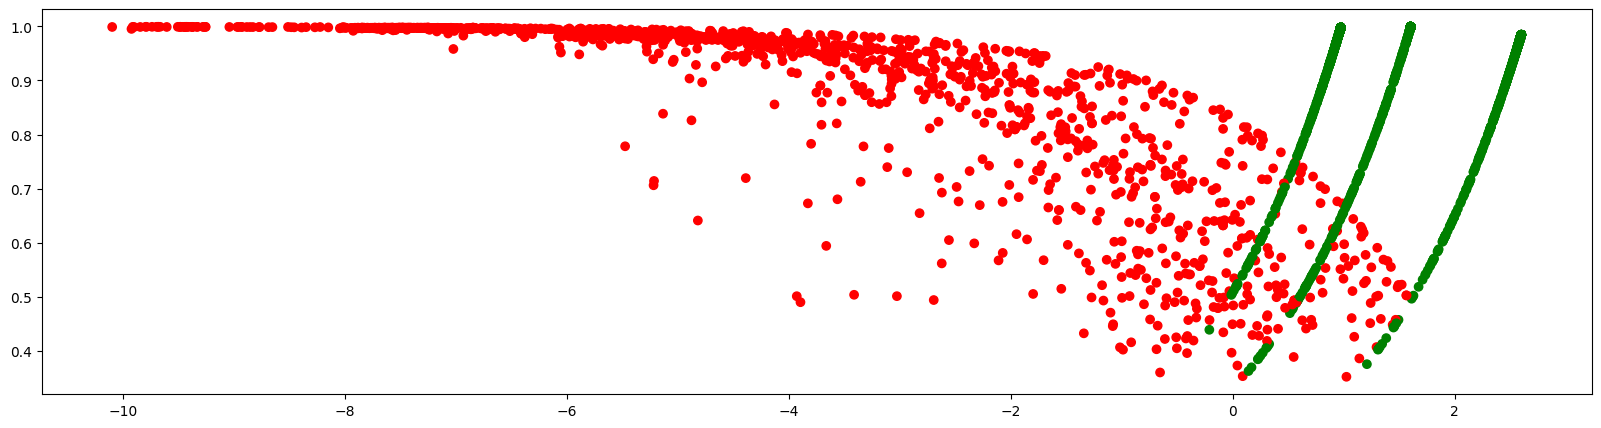

In [19]:
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=dev_data['correct_yx'], figsize=(20,5))

In [ ]:
plot_scatter_px(dev_data, "PVI", "predicted_score", colours="correct_yx", hover_name="label")

In [ ]:
plot_scatter_px(dev_data, "PVI", "predicted_score", colours="label", hover_data=["sentence1", "sentence2", "label", "predicted_label"], symbol="correct_yx", hover_name="label")

test

In [36]:
compute_correlation(test_data["PVI"], test_data["predicted_score"])

0.19941910583620795

<Figure size 15360x11520 with 0 Axes>

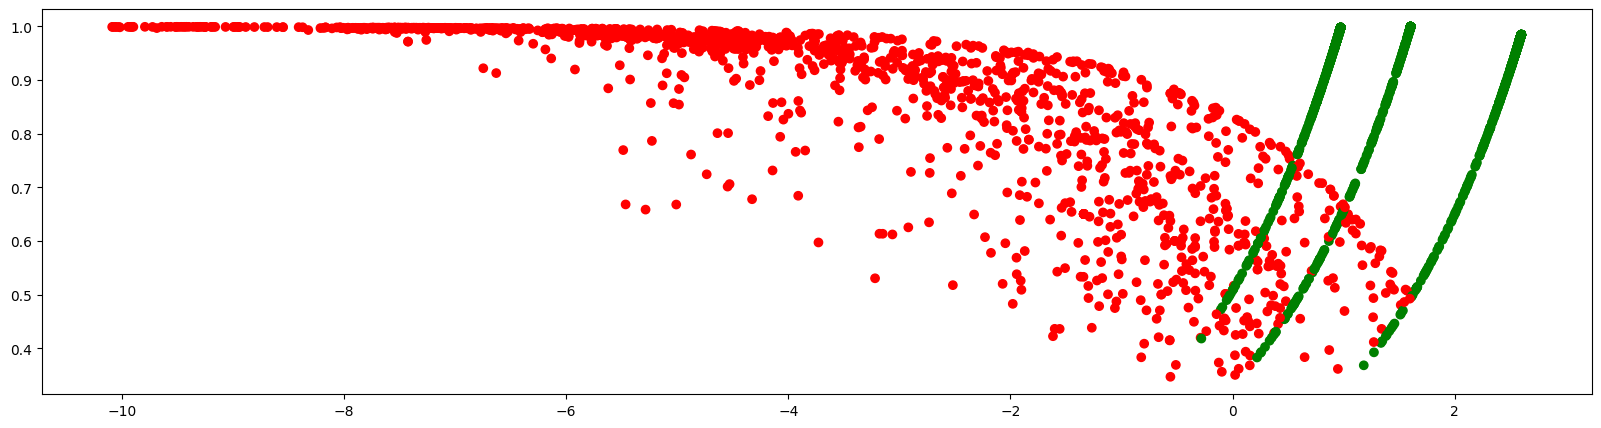

In [20]:
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=test_data['correct_yx'], figsize=(20,5))

In [ ]:
plot_scatter_px(test_data, "PVI", "predicted_score", colours="correct_yx")

In [ ]:
plot_scatter_px(test_data, "PVI", "predicted_score", colours="label", hover_data=["sentence1", "sentence2", "label", "predicted_label"], symbol="correct_yx", hover_name="label")

### Analyse data below 0

train

In [29]:
train_data

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yx,correct_yx,predicted_label,predicted_score,H_yb,PVI
0,0,55231,1,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,0.023433,True,1,0.983889,2.620849,2.597417
1,1,225400,2,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,0.001231,True,2,0.999147,1.603840,1.602608
2,2,184972,0,Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",0.029534,True,0,0.979737,0.975885,0.946352
3,3,208571,0,"Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...","Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...",0.003692,True,0,0.997444,0.975885,0.972193
4,4,100075,2,Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",0.008458,True,2,0.994155,1.603840,1.595382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118945,118945,6665,0,Hawaii Five-0 je restart.,"Hawaii 5-0. Hawaii 5-0 (též Havaj 5-0, v angli...",Hawaii Five-0 je restart.,"Hawaii 5-0. Hawaii 5-0 (též Havaj 5-0, v angli...",0.007848,True,0,0.994575,0.975885,0.968037
118946,118946,43743,2,Muhammad je pro tenis důležitý.,"Gulbuddín Hekmatjár. Gulbuddín Hekmatjár, (* 1...",Muhammad je pro tenis důležitý.,"Gulbuddín Hekmatjár. Gulbuddín Hekmatjár, (* 1...",0.001232,True,2,0.999146,1.603840,1.602608
118947,118947,66913,0,Xbox One byl vyroben společností Microsoft.,"Xbox One. Xbox One je videoherní konzole, kter...",Xbox One byl vyroben společností Microsoft.,"Xbox One. Xbox One je videoherní konzole, kter...",0.003721,True,0,0.997424,0.975885,0.972164
118948,118948,66780,0,Existuje fotbalista jménem Cristiano Ronaldo.,Cristiano Ronaldo. Cristiano Ronaldo dos Santo...,Existuje fotbalista jménem Cristiano Ronaldo.,Cristiano Ronaldo. Cristiano Ronaldo dos Santo...,0.003800,True,0,0.997370,0.975885,0.972085


In [26]:
def compute_below_zero_stats(data):
    zero_data = data[data["PVI"]<=0]
    labels, counts = np.unique(zero_data["label"].to_numpy(), return_counts=True)
    print(len(data["PVI"]))
    print(len(zero_data["PVI"]))
    print((len(zero_data["PVI"])/len(data["PVI"]))*100)
    print(labels)
    print("counts" + str(counts))
    print("percentages" + str(counts / np.sum(counts)*100))


In [27]:
compute_below_zero_stats(train_data)

118950
12741
10.711223203026481
[0 1 2]
counts[3605 3251 5885]
percentages[28.29448238 25.51605055 46.18946707]


dev

In [70]:
dev_data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,Mesačná ulica sa nachádza v mestskej časti Ost...,"Mesačná ulica (Bratislava) ""O zaniknutej ulic...",1,Mesačná ulica sa nachádza v mestskej časti Ost...,"Mesačná ulica (Bratislava) ""O zaniknutej ulic...",1.634433,0.001221,True,1,0.999154,1.633213
1,1,Serreslous-et-Arribans sa nachádza v Akvitánsku.,Serreslous-et-Arribans Serreslous-et-Arribans...,1,Serreslous-et-Arribans sa nachádza v Akvitánsku.,Serreslous-et-Arribans Serreslous-et-Arribans...,1.634433,2.930342,False,0,0.868685,-1.295909
2,2,Obec Houdelaincourt sa nachádza v departemente.,Houdelaincourt Houdelaincourt je francúzska o...,0,Obec Houdelaincourt sa nachádza v departemente.,Houdelaincourt Houdelaincourt je francúzska o...,1.546480,0.331602,True,0,0.794654,1.214879
3,3,Iný názov pre Spolkovú cestu je cesta 1.,Spolková cesta 1 (Rakúsko) Spolková cesta 1 a...,0,Iný názov pre Spolkovú cestu je cesta 1.,Spolková cesta 1 (Rakúsko) Spolková cesta 1 a...,1.546480,2.159903,False,1,0.762368,-0.613423
4,4,Socha sv. Šebastiána je nižšie postavená v sús...,Immaculata (Košice) O súsošie sa starali Koši...,2,Socha sv. Šebastiána je nižšie postavená v sús...,Immaculata (Košice) O súsošie sa starali Koši...,1.575362,0.000349,True,2,0.999758,1.575013
...,...,...,...,...,...,...,...,...,...,...,...,...
30082,30082,Obec Bernadets sa nachádza v oblasti.,"Bernadets Bernadets je francúzska obec, ktorá...",1,Obec Bernadets sa nachádza v oblasti.,"Bernadets Bernadets je francúzska obec, ktorá...",1.634433,0.001173,True,1,0.999187,1.633260
30083,30083,NGC 7432 je Pegas.,NGC 7432 NGC 7432 je galaxia v súhvezdí Pegas...,1,NGC 7432 je Pegas.,NGC 7432 NGC 7432 je galaxia v súhvezdí Pegas...,1.634433,0.001099,True,1,0.999239,1.633335
30084,30084,Gilbert je majster sveta z roku 2012.,Philippe Gilbert Philippe Gilbert (* 5. júl 1...,0,Gilbert je majster sveta z roku 2012.,Philippe Gilbert Philippe Gilbert (* 5. júl 1...,1.546480,0.244582,True,0,0.844060,1.301898
30085,30085,Železničná doprava vo Vysokých Tatrách je žele...,"Doprava vo Vysokých Tatrách ""Bližšie informác...",0,Železničná doprava vo Vysokých Tatrách je žele...,"Doprava vo Vysokých Tatrách ""Bližšie informác...",1.546480,2.763538,False,1,0.723406,-1.217058


In [71]:
compute_below_zero_stats(dev_data)

30087
2852
9.47917705321235
[0 1 2]
counts[ 594 1665  593]
percentages[20.82748948 58.38008415 20.79242637]


test

In [67]:
test_data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,"Kniha s názvom ""Bette a Joan: The Divine Feud""...",Joan Crawford Joan Crawford (vlastným menom L...,2,"Kniha s názvom ""Bette a Joan: The Divine Feud""...",Joan Crawford Joan Crawford (vlastným menom L...,1.575362,0.000095,True,2,0.999934,1.575268
1,1,Herec Metin Çekmez zomrel v roku Dincer Çekmez.,"Metin Çekmez Metin Çekmez (* 26. júl 1945, Is...",1,Herec Metin Çekmez zomrel v roku Dincer Çekmez.,"Metin Çekmez Metin Çekmez (* 26. júl 1945, Is...",1.634433,0.000951,True,1,0.999341,1.633482
2,2,Xenón je prvok 18. skupiny známy ako inertný p...,"Inertný plyn Inertný plyn je plyn, ktorý za d...",2,Xenón je prvok 18. skupiny známy ako inertný p...,"Inertný plyn Inertný plyn je plyn, ktorý za d...",1.575362,0.000102,True,2,0.999929,1.575260
3,3,V obci Varhaňovce prevláda osídlenie Varhaňovcov.,"Varhaňovce Obcou prechádza štátna cesta, ktor...",1,V obci Varhaňovce prevláda osídlenie Varhaňovcov.,"Varhaňovce Obcou prechádza štátna cesta, ktor...",1.634433,0.001305,True,1,0.999096,1.633129
4,4,Korejovce mali v roku 1961 141 obyvateľov.,Korejovce Korejovce sú obec na Slovensku v ok...,2,Korejovce mali v roku 1961 141 obyvateľov.,Korejovce Korejovce sú obec na Slovensku v ok...,1.575362,0.000112,True,2,0.999922,1.575250
...,...,...,...,...,...,...,...,...,...,...,...,...
28435,28435,V Byzantskej ríši vzniklo grófstvo.,Náboženstvo v Byzantskej ríši Proti Fotiovi s...,2,V Byzantskej ríši vzniklo grófstvo.,Náboženstvo v Byzantskej ríši Proti Fotiovi s...,1.575362,0.007162,True,2,0.995048,1.568200
28436,28436,Prehliadka pre fanúšikov sa konala v Camden Town.,"Ed Sheeran 2011 – 2013: Album ""+"" a medzináro...",2,Prehliadka pre fanúšikov sa konala v Camden Town.,"Ed Sheeran 2011 – 2013: Album ""+"" a medzináro...",1.575362,0.000141,True,2,0.999902,1.575222
28437,28437,Štvrtý prototyp stíhačky Heinkel He 112 bol vy...,Heinkel He 112 Heinkel He 112 bola nemecká st...,1,Štvrtý prototyp stíhačky Heinkel He 112 bol vy...,Heinkel He 112 Heinkel He 112 bola nemecká st...,1.634433,0.002032,True,1,0.998592,1.632401
28438,28438,"Názov prvého sériovo vyrábaného vozidla, ktoré...",Tesla (automobilka) Musk pôvodne v roku 2017 ...,1,"Názov prvého sériovo vyrábaného vozidla, ktoré...",Tesla (automobilka) Musk pôvodne v roku 2017 ...,1.634433,0.856358,True,1,0.552345,0.778075


In [68]:
compute_below_zero_stats(test_data)

28440
2923
10.277777777777777
[0 1 2]
counts[ 632 1619  672]
percentages[21.62162162 55.38829969 22.99007869]


### Save data for annotation

In [13]:
def sample_data(compute_bellow: bool, df):
    df = df.reset_index()
    df = df.drop(["sentence1", "sentence2", "Unnamed: 0"], axis=1)
    df["text"] = df.apply(lambda x: f"{x.claim}\n\n ########################### \n\n{x.evidence}", axis=1)
    if compute_bellow:
        bellow = df[df["PVI"]<0]
    else:
        bellow = df[df["PVI"]>=0]

    bellow_sup = bellow[bellow["label"]==0]
    bellow_ref = bellow[bellow["label"]==1]
    bellow_nei = bellow[bellow["label"]==2]
    SAMPLE_NUM = 17
    SEED = 123
    bellow_sup=bellow_sup.sample(n=SAMPLE_NUM, random_state=SEED)
    bellow_ref=bellow_ref.sample(n=SAMPLE_NUM, random_state=SEED)
    bellow_nei=bellow_nei.sample(n=SAMPLE_NUM, random_state=SEED)
    return pd.concat([bellow_sup, bellow_ref, bellow_nei])

In [22]:
data_bellow = sample_data(True, train_data)

In [23]:
data_above = sample_data(False, train_data)

In [24]:
data_bellow

,index,claim,evidence,label,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,text
256635,256635,V Bazilike svätých Petra a Pavla v obci Přecho...,Bazilika svätých Petra a Pavla Opis stavby. ...,0,1.546480,2.135502,False,1,0.569932,-0.589022,V Bazilike svätých Petra a Pavla v obci Přecho...
94423,94423,Výraz polytechnika sa v češtine používa.,Polytechnika Polytechnika alebo polytechnická...,0,1.546480,3.457727,False,1,0.891461,-1.911246,Výraz polytechnika sa v češtine používa.\n\n #...
60942,60942,Pamiatkový úrad SR zriadil múzejnú expozíciu v...,Červený kláštor Z tunajších mníchov sa do naš...,0,1.546480,5.537186,False,2,0.943771,-3.990706,Pamiatkový úrad SR zriadil múzejnú expozíciu v...
275212,275212,Najväčšou krajinou Kórejskej republiky je Kórea.,Kórea A tým sa Tan-gun (단군) stal prvým predko...,0,1.546480,5.351928,False,1,0.972700,-3.805448,Najväčšou krajinou Kórejskej republiky je Kóre...
57358,57358,Žofínský prales sa nachádza v Európe.,Žofínský prales Žofínský prales je národná pr...,0,1.546480,3.726771,False,1,0.899294,-2.180290,Žofínský prales sa nachádza v Európe.\n\n ####...
86865,86865,Súčasťou zoznamov kultúrnych pamiatok v štádiu...,Zoznam kultúrnych pamiatok v obci Nižná Kameni...,0,1.546480,2.501021,False,1,0.811095,-0.954540,Súčasťou zoznamov kultúrnych pamiatok v štádiu...
153534,153534,Hostiteľom majstrovstiev sveta 1998 bol v roku...,Majstrovstvá sveta vo futbale 1998 Výber host...,0,1.546480,4.828883,False,1,0.957864,-3.282403,Hostiteľom majstrovstiev sveta 1998 bol v roku...
198512,198512,Organizácia Child Left Behind podporuje hodnot...,"No Child Left Behind Organizácie, ktoré podpo...",0,1.546480,1.958091,False,1,0.727957,-0.411611,Organizácia Child Left Behind podporuje hodnot...
58172,58172,Toufarov zázrak bol účastníkom.,"Josef Toufar Josef Toufar (* 14. júl 1902, Ar...",0,1.546480,4.119860,False,1,0.933045,-2.573379,Toufarov zázrak bol účastníkom.\n\n ##########...
211819,211819,Tremulous Blaster sa vyrovna puske s puskom.,Tremulous Blaster. Blaster je mala energetic...,0,1.546480,7.664570,False,1,0.993764,-6.118090,Tremulous Blaster sa vyrovna puske s puskom.\n...


In [25]:
data_above

,index,claim,evidence,label,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,text
15359,15359,SNP bol názov Slovenského národného povstania.,Slovenské národné povstanie Slovenské národné...,0,1.546480,0.154871,True,0,0.898213,1.391609,SNP bol názov Slovenského národného povstania....
11275,11275,L. Svobodu bol prezidentom Československa v ro...,Ludvík Svoboda (prezident) V pretrvávajúcej r...,0,1.546480,1.257976,False,1,0.551322,0.288504,L. Svobodu bol prezidentom Československa v ro...
237762,237762,Obec Saint-Colomban-des-Villards sa nachádza v...,Saint-Colomban-des-Villards Saint-Colomban-de...,0,1.546480,0.096278,True,0,0.935443,1.450202,Obec Saint-Colomban-des-Villards sa nachádza v...
262721,262721,Vitry-sur-Seine tvorí západnú časť Vitry-sur-S...,Vitry-sur-Seine-Ouest Vitry-sur-Seine-Ouest j...,0,1.546480,0.005398,True,0,0.996266,1.541083,Vitry-sur-Seine tvorí západnú časť Vitry-sur-S...
164309,164309,Meno anglickej speváčky bolo Gery Scott.,Gery Scott Gery Scott vlastným menom Diana Ge...,0,1.546480,0.353797,True,0,0.782522,1.192684,Meno anglickej speváčky bolo Gery Scott.\n\n #...
37824,37824,Obec Quercitello sa nachádza v departemente Ha...,"Quercitello Quercitello je francúzska obec, k...",0,1.546480,0.114532,True,0,0.923682,1.431948,Obec Quercitello sa nachádza v departemente Ha...
219426,219426,Okresný úrad vydal súhlas s výstavbou obce Per...,Košice – mestská časť Pereš História. Pereš ...,0,1.546480,0.074758,True,0,0.949501,1.471722,Okresný úrad vydal súhlas s výstavbou obce Per...
212856,212856,Christian Vander sa narodil 21. február.,Christian Vander Christian Vander (* 21. febr...,0,1.546480,0.447679,True,0,0.733222,1.098802,Christian Vander sa narodil 21. február.\n\n #...
146457,146457,INSEE poskytla zdroje pre vývoj počtu obyvateľ...,"Litteau Litteau je francúzska obec, ktorá sa ...",0,1.546480,0.003441,True,0,0.997618,1.543040,INSEE poskytla zdroje pre vývoj počtu obyvateľ...
290933,290933,NGC 5656 je galaxia.,NGC 5656 NGC 5656 je galaxia v súhvezdí Pasti...,0,1.546480,0.017012,True,0,0.988277,1.529468,NGC 5656 je galaxia.\n\n #####################...


In [26]:
final_data = pd.concat([data_bellow, data_above])

In [27]:
final_data

,index,claim,evidence,label,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,text
256635,256635,V Bazilike svätých Petra a Pavla v obci Přecho...,Bazilika svätých Petra a Pavla Opis stavby. ...,0,1.546480,2.135502,False,1,0.569932,-0.589022,V Bazilike svätých Petra a Pavla v obci Přecho...
94423,94423,Výraz polytechnika sa v češtine používa.,Polytechnika Polytechnika alebo polytechnická...,0,1.546480,3.457727,False,1,0.891461,-1.911246,Výraz polytechnika sa v češtine používa.\n\n #...
60942,60942,Pamiatkový úrad SR zriadil múzejnú expozíciu v...,Červený kláštor Z tunajších mníchov sa do naš...,0,1.546480,5.537186,False,2,0.943771,-3.990706,Pamiatkový úrad SR zriadil múzejnú expozíciu v...
275212,275212,Najväčšou krajinou Kórejskej republiky je Kórea.,Kórea A tým sa Tan-gun (단군) stal prvým predko...,0,1.546480,5.351928,False,1,0.972700,-3.805448,Najväčšou krajinou Kórejskej republiky je Kóre...
57358,57358,Žofínský prales sa nachádza v Európe.,Žofínský prales Žofínský prales je národná pr...,0,1.546480,3.726771,False,1,0.899294,-2.180290,Žofínský prales sa nachádza v Európe.\n\n ####...
...,...,...,...,...,...,...,...,...,...,...,...
55618,55618,Názov nového koncentračného tábora Auschwitz b...,Koncentračný tábor Auschwitz I Podmienky v tá...,2,1.575362,0.002529,True,2,0.998248,1.572833,Názov nového koncentračného tábora Auschwitz b...
62335,62335,Príkladom bitky o Západný breh Viipurského zál...,Bitka (vojenstvo) Typy bitiek. Bitky sa prim...,2,1.575362,0.000280,True,2,0.999806,1.575082,Príkladom bitky o Západný breh Viipurského zál...
280546,280546,Vláda národnej jednoty začala 16. októbra 1944.,Vláda národnej jednoty (Maďarsko) Podľa Hitle...,2,1.575362,0.000094,True,2,0.999935,1.575269,Vláda národnej jednoty začala 16. októbra 1944...
133397,133397,Princ Jusupoff patril do spoločenského krúžku ...,"Rosemonde Gérardová Rosemonde Gérardová, celý...",2,1.575362,0.000084,True,2,0.999942,1.575279,Princ Jusupoff patril do spoločenského krúžku ...


In [20]:
final_data["dataset_label"] = final_data["label"]
final_data.to_json("/home/mlynatom/data/generated_annotations/sk/data_to_annotate.jsonl", orient="records", lines=True, force_ascii=True)

### Save to Jan Drchal's format

In [4]:
def process_to_format(df):
    rename_dict = {0: "s", 1: "r", 2:"n"}
    df = df.rename(columns={"evidence": "context", "evidence_source": "evidence"})
    df["label"] = df.apply(lambda x: rename_dict[x.label], axis=1)
    df["predicted_label"] = df.apply(lambda x: rename_dict[x.predicted_label], axis=1)
    df = df.drop(["sentence1", "sentence2", "Unnamed: 0"], axis=1)
    return df

In [42]:
PREFIX = "enfever"

In [43]:
test_data

,Unnamed: 0,id,label,evidence,claim,sentence1,sentence2,H_yx,correct_yx,predicted_label,predicted_score,H_yb,PVI
0,0,113501,2,Grease (film). Grease was successful both crit...,Grease had bad reviews.,Grease had bad reviews.,Grease (film). Grease was successful both crit...,4.175993,False,1,0.932842,2.827567,-1.348425
1,1,163803,0,Ukrainian Soviet Socialist Republic. The Ukrai...,Ukrainian Soviet Socialist Republic was a foun...,Ukrainian Soviet Socialist Republic was a foun...,Ukrainian Soviet Socialist Republic. The Ukrai...,0.027400,True,0,0.981187,0.654157,0.626757
2,2,70041,0,"""2 Hearts"" is a song recorded by Australian si...",2 Hearts is a musical composition by Minogue.,2 Hearts is a musical composition by Minogue.,"""2 Hearts"" is a song recorded by Australian si...",0.016729,True,0,0.988471,0.654157,0.637428
3,3,202314,1,New Jersey Turnpike. The Turnpike has 12 ft la...,The New Jersey Turnpike has zero shoulders.,The New Jersey Turnpike has zero shoulders.,New Jersey Turnpike. The Turnpike has 12 ft la...,0.027083,True,1,0.981402,2.160468,2.133385
4,4,57085,2,Legendary Entertainment (also known as Legenda...,Legendary Entertainment is the owner of Wanda ...,Legendary Entertainment is the owner of Wanda ...,Legendary Entertainment (also known as Legenda...,0.123845,True,2,0.917738,2.827567,2.703722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,8538,1,NaN,Hermit crabs are arachnids.,Hermit crabs are arachnids.,NaN,10.871466,False,2,0.998925,2.160468,-8.710997
9995,9995,145641,1,Michael Hutchence. On the morning of 22 Novemb...,Michael Hutchence died on a boat.,Michael Hutchence died on a boat.,Michael Hutchence. On the morning of 22 Novemb...,0.339117,True,1,0.790525,2.160468,1.821352
9996,9996,87517,0,"The Cyclades ([ˈsɪklədiːz] Κυκλάδες, [cikˈlað...",The Cyclades are located to the southeast of G...,The Cyclades are located to the southeast of G...,"The Cyclades ([ˈsɪklədiːz] Κυκλάδες, [cikˈlað...",0.017901,True,0,0.987669,0.654157,0.636256
9997,9997,111816,2,NaN,Theresa May worked the docks.,Theresa May worked the docks.,NaN,0.001050,True,2,0.999273,2.827567,2.826518


In [44]:
processed_test = process_to_format(test_data)

In [45]:
processed_test

,id,label,context,claim,H_yx,correct_yx,predicted_label,predicted_score,H_yb,PVI
0,113501,n,Grease (film). Grease was successful both crit...,Grease had bad reviews.,4.175993,False,r,0.932842,2.827567,-1.348425
1,163803,s,Ukrainian Soviet Socialist Republic. The Ukrai...,Ukrainian Soviet Socialist Republic was a foun...,0.027400,True,s,0.981187,0.654157,0.626757
2,70041,s,"""2 Hearts"" is a song recorded by Australian si...",2 Hearts is a musical composition by Minogue.,0.016729,True,s,0.988471,0.654157,0.637428
3,202314,r,New Jersey Turnpike. The Turnpike has 12 ft la...,The New Jersey Turnpike has zero shoulders.,0.027083,True,r,0.981402,2.160468,2.133385
4,57085,n,Legendary Entertainment (also known as Legenda...,Legendary Entertainment is the owner of Wanda ...,0.123845,True,n,0.917738,2.827567,2.703722
...,...,...,...,...,...,...,...,...,...,...
9994,8538,r,NaN,Hermit crabs are arachnids.,10.871466,False,n,0.998925,2.160468,-8.710997
9995,145641,r,Michael Hutchence. On the morning of 22 Novemb...,Michael Hutchence died on a boat.,0.339117,True,r,0.790525,2.160468,1.821352
9996,87517,s,"The Cyclades ([ˈsɪklədiːz] Κυκλάδες, [cikˈlað...",The Cyclades are located to the southeast of G...,0.017901,True,s,0.987669,0.654157,0.636256
9997,111816,n,NaN,Theresa May worked the docks.,0.001050,True,n,0.999273,2.827567,2.826518


In [46]:
processed_test.to_json(f"/home/mlynatom/data/{PREFIX}_withPVI/test_balanced_PVI.jsonl", orient="records", lines=True, force_ascii=True)

In [47]:
processed_dev = process_to_format(dev_data)

In [48]:
processed_dev

,id,label,context,claim,H_yx,correct_yx,predicted_label,predicted_score,H_yb,PVI
0,91198,n,Colin Kaepernick. Kaepernick began his profess...,Colin Kaepernick became a starting quarterback...,1.572029,False,r,0.512576,2.827567,1.255539
1,194462,n,"Katherine Matilda ""Tilda"" Swinton (born 5 Nove...",Tilda Swinton is a vegan.,0.003737,True,n,0.997413,2.827567,2.823831
2,137334,s,Soul Food is a 1997 American comedy-drama film...,Fox 2000 Pictures released the film Soul Food.,0.002413,True,s,0.998329,0.654157,0.651744
3,166626,n,"Anne Rice. Born in New Orleans, Rice spent muc...",Anne Rice was born in New Jersey.,3.235513,False,r,0.551174,2.827567,-0.407946
4,111897,r,Telemundo ([teleˈmundo]) is an American Spanis...,Telemundo is a English-language television net...,0.219881,True,r,0.858636,2.160468,1.940587
...,...,...,...,...,...,...,...,...,...,...
9994,113783,n,Heavy metal (or simply metal) is a genre of ro...,Heavy Metal music was first developed in the U...,4.750529,False,s,0.959894,2.827567,-1.922961
9995,55560,n,NaN,Bethany Hamilton was a philosopher.,0.001213,True,n,0.999160,2.827567,2.826354
9996,33414,n,NaN,Mike Huckabee hosts Oprah.,0.001130,True,n,0.999217,2.827567,2.826438
9997,208436,n,Excuse My French is the debut studio album by ...,Excuse My French is a studio EP.,3.393750,False,r,0.900320,2.827567,-0.566183


In [49]:
processed_dev.to_json(f"/home/mlynatom/data/{PREFIX}_withPVI/dev_balanced_PVI.jsonl", orient="records", lines=True, force_ascii=True)

In [50]:
processed_train = process_to_format(train_data)

In [51]:
processed_train

,id,label,context,claim,H_yx,correct_yx,predicted_label,predicted_score,H_yb,PVI
0,75397,s,The Fox Broadcasting Company (often shortened ...,Nikolaj Coster-Waldau worked with the Fox Broa...,0.063786,True,s,0.956750,0.654157,0.590371
1,150448,s,"Roman Atwood. He is best known for his vlogs, ...",Roman Atwood is a content creator.,0.004992,True,s,0.996545,0.654157,0.649164
2,150448,s,"Roman Atwood. His vlogging channel, ""RomanAtwo...",Roman Atwood is a content creator.,0.001963,True,s,0.998641,0.654157,0.652194
3,214861,s,History of art. The subsequent expansion of th...,"History of art includes architecture, dance, s...",0.017698,True,s,0.987807,0.654157,0.636459
4,156709,r,Adrienne Eliza Houghton (née Bailon; born Oct...,Adrienne Bailon is an accountant.,4.391725,False,n,0.948827,2.160468,-2.231257
...,...,...,...,...,...,...,...,...,...,...
208341,13114,s,Gimli is a fictional character from J. R. R. T...,J. R. R. Tolkien created Gimli.,0.021730,True,s,0.985051,0.654157,0.632427
208342,13114,s,Gimli is a fictional character from J. R. R. T...,J. R. R. Tolkien created Gimli.,0.036764,True,s,0.974839,0.654157,0.617393
208343,152180,s,Susan Sarandon. She was appointed a UNICEF Goo...,Susan Sarandon is an award winner.,0.010948,True,s,0.992440,0.654157,0.643209
208344,152180,s,Susan Sarandon. She was appointed a UNICEF Goo...,Susan Sarandon is an award winner.,0.013907,True,s,0.990407,0.654157,0.640250


In [40]:
processed_train.to_json(f"/home/mlynatom/data/{PREFIX}_withPVI/train_balanced_PVI.jsonl", orient="records", lines=True, force_ascii=True)

## Analysis with anotated data

### Concat train and dev split (annotated data were chosen from them)

In [119]:
train_dev_data = pd.concat([train_data, dev_data])

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118950 entries, 0 to 118949
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       118950 non-null  int64  
 1   id               118950 non-null  int64  
 2   label            118950 non-null  int64  
 3   claim            118950 non-null  object 
 4   evidence         118950 non-null  object 
 5   sentence1        118950 non-null  object 
 6   sentence2        118950 non-null  object 
 7   H_yb             118950 non-null  float64
 8   H_yx             118950 non-null  float64
 9   correct_yx       118950 non-null  bool   
 10  predicted_label  118950 non-null  int64  
 11  predicted_score  118950 non-null  float64
 12  PVI              118950 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 11.0+ MB


In [29]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7458 non-null   int64  
 1   id               7458 non-null   int64  
 2   label            7458 non-null   int64  
 3   claim            7458 non-null   object 
 4   evidence         7458 non-null   object 
 5   sentence1        7458 non-null   object 
 6   sentence2        7458 non-null   object 
 7   H_yb             7458 non-null   float64
 8   H_yx             7458 non-null   float64
 9   correct_yx       7458 non-null   bool   
 10  predicted_label  7458 non-null   int64  
 11  predicted_score  7458 non-null   float64
 12  PVI              7458 non-null   float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 706.6+ KB


In [40]:
train_dev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126408 entries, 0 to 7457
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       126408 non-null  int64  
 1   id               126408 non-null  int64  
 2   label            126408 non-null  int64  
 3   claim            126408 non-null  object 
 4   evidence         126408 non-null  object 
 5   sentence1        126408 non-null  object 
 6   sentence2        126408 non-null  object 
 7   H_yb             126408 non-null  float64
 8   H_yx             126408 non-null  float64
 9   correct_yx       126408 non-null  bool   
 10  predicted_label  126408 non-null  int64  
 11  predicted_score  126408 non-null  float64
 12  PVI              126408 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 12.7+ MB


### Remap values

In [121]:
label_dict = {0: "SUPPORTS",
              1: "REFUTES",
              2: "NOT ENOUGH INFO"}

In [122]:
remaped_data = train_dev_data.replace({"predicted_label": label_dict, "label": label_dict})

In [123]:
train_data.replace({"predicted_label": label_dict, "label": label_dict}, inplace=True)

In [124]:
dev_data.replace({"predicted_label": label_dict, "label": label_dict}, inplace=True)

In [125]:
test_data.replace({"predicted_label": label_dict, "label": label_dict}, inplace=True)

In [126]:
remaped_data

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,55231,REFUTES,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,2.620849,0.050512,True,REFUTES,0.965593,2.570337
1,1,225400,NOT ENOUGH INFO,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,1.603840,0.000850,True,NOT ENOUGH INFO,0.999411,1.602990
2,2,184972,SUPPORTS,Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",0.975885,0.046157,True,SUPPORTS,0.968513,0.929728
3,3,208571,SUPPORTS,"Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...","Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...",0.975885,0.005154,True,SUPPORTS,0.996434,0.970731
4,4,100075,NOT ENOUGH INFO,Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",1.603840,0.121568,True,NOT ENOUGH INFO,0.919188,1.482272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453,7453,172480,NOT ENOUGH INFO,Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",1.603840,0.306210,True,NOT ENOUGH INFO,0.808764,1.297630
7454,7454,216396,NOT ENOUGH INFO,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,1.603840,0.000993,True,NOT ENOUGH INFO,0.999312,1.602846
7455,7455,196982,NOT ENOUGH INFO,Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",1.603840,0.000523,True,NOT ENOUGH INFO,0.999637,1.603316
7456,7456,173497,NOT ENOUGH INFO,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,1.603840,0.001806,True,NOT ENOUGH INFO,0.998749,1.602034


In [127]:
remaped_data.rename({"id":"fever_id"}, axis=1, inplace=True)

In [128]:
remaped_data

,Unnamed: 0,fever_id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,55231,REFUTES,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,2.620849,0.050512,True,REFUTES,0.965593,2.570337
1,1,225400,NOT ENOUGH INFO,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,1.603840,0.000850,True,NOT ENOUGH INFO,0.999411,1.602990
2,2,184972,SUPPORTS,Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",0.975885,0.046157,True,SUPPORTS,0.968513,0.929728
3,3,208571,SUPPORTS,"Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...","Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...",0.975885,0.005154,True,SUPPORTS,0.996434,0.970731
4,4,100075,NOT ENOUGH INFO,Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",1.603840,0.121568,True,NOT ENOUGH INFO,0.919188,1.482272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453,7453,172480,NOT ENOUGH INFO,Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",1.603840,0.306210,True,NOT ENOUGH INFO,0.808764,1.297630
7454,7454,216396,NOT ENOUGH INFO,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,1.603840,0.000993,True,NOT ENOUGH INFO,0.999312,1.602846
7455,7455,196982,NOT ENOUGH INFO,Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",1.603840,0.000523,True,NOT ENOUGH INFO,0.999637,1.603316
7456,7456,173497,NOT ENOUGH INFO,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,1.603840,0.001806,True,NOT ENOUGH INFO,0.998749,1.602034


### Load annotated data

In [38]:
annotated_data = pd.read_csv("/media/storage/Downloads/PVI/fever_pair_1%_annotated.csv", delimiter=";")
#annotated_data = pd.read_csv("/home/mlynatom/data/annotated_fcheck/fever_pair_200_closest_annotated.csv", delimiter=";")
#annotated_data = pd.read_csv("/home/mlynatom/data/annotated_fcheck/fever_pair.csv", delimiter=";")

In [39]:
annotated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1283 non-null   int64  
 1   fever_id     1283 non-null   int64  
 2   claim        1283 non-null   object 
 3   claim_cs     1283 non-null   object 
 4   evidence     1283 non-null   object 
 5   evidence_cs  1283 non-null   object 
 6   label        1283 non-null   object 
 7   label_cs     1283 non-null   object 
 8   checked_by   1283 non-null   int64  
 9   created_at   0 non-null      float64
 10  updated_at   1283 non-null   int64  
 11  random       0 non-null      float64
dtypes: float64(2), int64(4), object(6)
memory usage: 120.4+ KB


In [40]:
annotated_data.head()

,id,fever_id,claim,claim_cs,evidence,evidence_cs,label,label_cs,checked_by,created_at,updated_at,random
0,1,20036,Paul McCartney is a two-time inductee into the...,Paul McCartney byl dvakrát uveden do Rock'n'ro...,"[[""Paul McCartney"", 9]]","{""Paul McCartney"": ""Sir James Paul McCartney C...",SUPPORTS,MISTRANSLATED,350,NaN,1676294555,NaN
1,2,17792,Warren Buffett is a philanthropist.,Warren Buffett je filantrop.,"[[""Warren Buffett"", 0]]","{""Warren Buffett"": ""Warren Edward Buffett, \n\...",SUPPORTS,SUPPORTS,350,NaN,1676549803,NaN
2,3,72323,Woody Allen has won four Oscars.,Woody Allen získal čtyři Oscary.,"[[""Woody Allen"", 17], [""Oscar"", 0]]","{""Oscar"": ""Oscar, jinak také Cena Akademie (an...",SUPPORTS,SUPPORTS,350,NaN,1676293747,NaN
3,4,41890,Cells are fundamental units of structure and f...,Buňky jsou základní jednotky struktury a funkce.,"[[""Buňka"", 12]]","{""Buňka"": ""Buňka (lat. \""cellula\"") je základn...",SUPPORTS,SUPPORTS,350,NaN,1676550363,NaN
4,5,58083,Batman is exceptionally unintelligent.,Batman je výjimečně neinteligentní.,"[[""Batman"", 11]]","{""Batman"": ""Batman je komiksová postava, stvoř...",REFUTES,REFUTES,350,NaN,1676468199,NaN


### Merge human_labels

In [129]:
merged_data = pd.merge(remaped_data, annotated_data[["fever_id", "label_cs"]], on="fever_id", how="inner")

In [130]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1421 non-null   int64  
 1   fever_id         1421 non-null   int64  
 2   label            1421 non-null   object 
 3   claim            1421 non-null   object 
 4   evidence         1421 non-null   object 
 5   sentence1        1421 non-null   object 
 6   sentence2        1421 non-null   object 
 7   H_yb             1421 non-null   float64
 8   H_yx             1421 non-null   float64
 9   correct_yx       1421 non-null   bool   
 10  predicted_label  1421 non-null   object 
 11  predicted_score  1421 non-null   float64
 12  PVI              1421 non-null   float64
 13  label_cs         1421 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 145.8+ KB


In [131]:
merged_data

,Unnamed: 0,fever_id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,label_cs
0,232,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
1,26640,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
2,55985,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
3,82485,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
4,90146,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,7146,131728,REFUTES,Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",2.620849,3.173844,False,SUPPORTS,0.681257,-0.552995,NOT ENOUGH INFO
1417,7262,139714,REFUTES,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,2.620849,7.499441,False,NOT ENOUGH INFO,0.990948,-4.878592,NOT ENOUGH INFO
1418,7372,119516,SUPPORTS,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,0.975885,0.119395,True,SUPPORTS,0.920573,0.856490,NOT ENOUGH INFO
1419,7400,9718,SUPPORTS,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,0.975885,0.021641,True,SUPPORTS,0.985111,0.954244,SUPPORTS


### Rename columns to follow convention

fever_label = original label in FEVER dataset

predicted_label = label predicted originally by the model

human_label = label given by a human annotator (considered to be a gold label)

In [132]:
merged_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [133]:
train_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [134]:
dev_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [135]:
test_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [136]:
merged_data

,Unnamed: 0,fever_id,fever_label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,human_label
0,232,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
1,26640,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
2,55985,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
3,82485,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
4,90146,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,7146,131728,REFUTES,Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",2.620849,3.173844,False,SUPPORTS,0.681257,-0.552995,NOT ENOUGH INFO
1417,7262,139714,REFUTES,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,2.620849,7.499441,False,NOT ENOUGH INFO,0.990948,-4.878592,NOT ENOUGH INFO
1418,7372,119516,SUPPORTS,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,0.975885,0.119395,True,SUPPORTS,0.920573,0.856490,NOT ENOUGH INFO
1419,7400,9718,SUPPORTS,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,0.975885,0.021641,True,SUPPORTS,0.985111,0.954244,SUPPORTS


### Plot MISTRANSLATED

<Figure size 14400x9600 with 0 Axes>

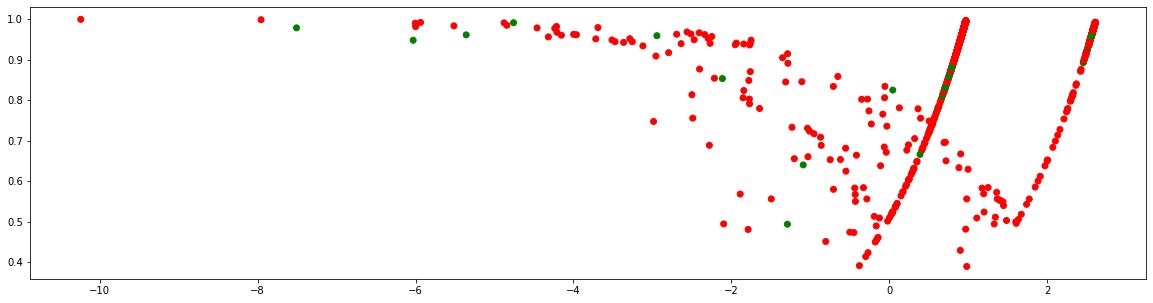

In [137]:
plot_scatter(x=merged_data["PVI"], y=merged_data["predicted_score"], to_colours=merged_data.apply(lambda x: x.human_label == "MISTRANSLATED", axis=1), figsize=(20,5))

In [ ]:
plot_scatter_px(df=merged_data, x="PVI", y="predicted_score", colours=merged_data.apply(lambda x: x.human_label == "MISTRANSLATED", axis=1), hover_name="fever_id", hover_data=["claim", "fever_label", "predicted_label", "human_label"])

### Change MISTRANSLATED to NOT ENOUGH INFO

In [139]:
merged_data.replace({"human_label": {"MISTRANSLATED": "NOT ENOUGH INFO"}}, inplace=True)

In [140]:
np.unique(merged_data.human_label.to_numpy())

array(['NOT ENOUGH INFO', 'REFUTES', 'SUPPORTS'], dtype=object)

### Compute and plot correlation

create colors

In [141]:
merged_data["all_matches"] = merged_data.apply(lambda x: x.fever_label == x.predicted_label == x.human_label, axis=1)

In [142]:
merged_data["no_matches"] = merged_data.apply(lambda x: x.fever_label != x.predicted_label and x.fever_label != x.human_label, axis=1)

In [143]:
merged_data["fever_predicted_matches"] = merged_data.apply(lambda x: x.fever_label == x.predicted_label and x.fever_label != x.human_label, axis=1)

In [144]:
merged_data["human_predicted_matches"] = merged_data.apply(lambda x: x.human_label == x.predicted_label and x.fever_label != x.human_label, axis=1)

In [145]:
merged_data["human_fever_matches"] = merged_data.apply(lambda x: x.human_label == x.fever_label and x.fever_label != x.predicted_label, axis=1)

In [146]:
def color_column(x):
    if x.all_matches:
        return "green"
    elif x.no_matches:
        return "red"
    elif x.fever_predicted_matches:
        return "blue"
    elif x.human_predicted_matches:
        return "pink"
    elif x.human_fever_matches:
        return "orange"

In [147]:
merged_data["colors"] = merged_data.apply(color_column, axis=1)

In [148]:
merged_data

,Unnamed: 0,fever_id,fever_label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,human_label,all_matches,no_matches,fever_predicted_matches,human_predicted_matches,human_fever_matches,colors
0,232,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS,True,False,False,False,False,green
1,26640,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS,True,False,False,False,False,green
2,55985,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS,True,False,False,False,False,green
3,82485,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS,True,False,False,False,False,green
4,90146,31047,SUPPORTS,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS,True,False,False,False,False,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,7146,131728,REFUTES,Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",2.620849,3.173844,False,SUPPORTS,0.681257,-0.552995,NOT ENOUGH INFO,False,True,False,False,False,red
1417,7262,139714,REFUTES,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,2.620849,7.499441,False,NOT ENOUGH INFO,0.990948,-4.878592,NOT ENOUGH INFO,False,True,False,True,False,red
1418,7372,119516,SUPPORTS,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,0.975885,0.119395,True,SUPPORTS,0.920573,0.856490,NOT ENOUGH INFO,False,False,True,False,False,blue
1419,7400,9718,SUPPORTS,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,0.975885,0.021641,True,SUPPORTS,0.985111,0.954244,SUPPORTS,True,False,False,False,False,green


In [149]:
np.unique(merged_data["colors"].to_numpy(), return_counts=True)

(array(['blue', 'green', 'orange', 'red'], dtype=object),
 array([392, 884,  62,  83]))

relation between mislabeled (from human_labels) and PVI

<Figure size 14400x9600 with 0 Axes>

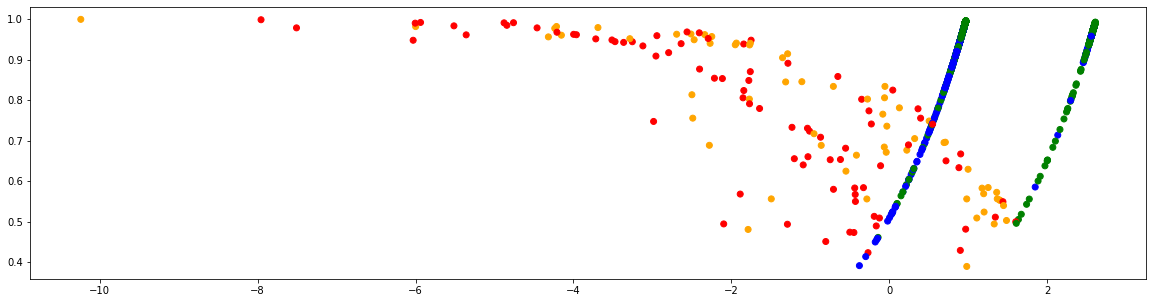

In [150]:
plot_scatter(x=merged_data["PVI"], y=merged_data["predicted_score"], colours=merged_data["colors"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=merged_data, x="PVI", y="predicted_score", colours="colors", hover_name="fever_id", hover_data=["claim", "fever_label", "predicted_label", "human_label"])

## Deleted data analysis using PVI

### Optimize new threshold (new model, without scaling)

In [18]:
from sklearn import metrics
import scipy.optimize as opt

For filtering #1

In [30]:
def create_new_labels(x, threshold):
    if x.predicted_score < threshold:
        return "NOT ENOUGH INFO"
    else:
        return x.predicted_label

In [31]:
def opt_func_f1(threshold):
    human_labels = merged_data.human_label.to_numpy()
    predicted_labels = merged_data.apply(create_new_labels, axis=1, threshold=threshold).to_numpy()
    f1_score = metrics.f1_score(human_labels, predicted_labels, average="macro")
    return -f1_score

Optimize!

In [32]:
res = opt.fminbound(opt_func_f1, 0, 1, disp=3, xtol=1e-03, maxfun=30)

 
 Func-count     x          f(x)          Procedure
    1       0.381966    -0.530898        initial
    2       0.618034    -0.561718        golden
    3       0.763932    -0.602156        golden
    4       0.854102      -0.6302        golden
    5        0.90983    -0.661452        golden
    6       0.944272    -0.688102        golden
    7       0.965558      -0.6614        golden
    8       0.937681    -0.682184        parabolic
    9       0.952403    -0.676655        golden
   10       0.943843    -0.687625        parabolic
   11       0.947378    -0.684712        golden
   12       0.944949     -0.68733        parabolic
   13       0.944605    -0.686122        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.001 )


In [36]:
res

0.9442719099991588

For filtering #2

In [19]:
def create_new_labels2(x, threshold):
    if (x.fever_label != x.predicted_label) and (x.predicted_score < threshold):
        return "NOT ENOUGH INFO"
    else:
        return x.predicted_label

In [20]:
def opt_func_f1_2(threshold):
    human_labels = merged_data.human_label.to_numpy()
    predicted_labels = merged_data.apply(create_new_labels2, axis=1, threshold=threshold).to_numpy()
    f1_score = metrics.f1_score(human_labels, predicted_labels, average="macro")
    return -f1_score

In [21]:
res2 = opt.fminbound(opt_func_f1_2, 0, 1, disp=3, xtol=1e-03, maxfun=30)

 
 Func-count     x          f(x)          Procedure
    1       0.381966    -0.530898        initial
    2       0.618034    -0.540988        golden
    3       0.763932    -0.569219        golden
    4       0.854102    -0.581759        golden
    5        0.90983    -0.589802        golden
    6       0.944272     -0.59805        golden
    7       0.965558     -0.60385        golden
    8       0.978714    -0.606565        golden
    9       0.986844    -0.607676        golden
   10       0.991869     -0.60882        golden
   11       0.994975    -0.608435        golden
   12       0.992203    -0.608435        parabolic
   13        0.98995    -0.607676        golden
   14       0.991136    -0.607676        golden
   15       0.991536     -0.60882        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.001 )


In [22]:
res2

0.9915360331990829

For filtering #3

In [23]:
def create_new_labels3(x, threshold):
    if (x.fever_label != x.predicted_label) and (x.predicted_score >= threshold):
        return "NOT ENOUGH INFO"
    else:
        return x.predicted_label

In [24]:
def opt_func_f1_3(threshold):
    human_labels = merged_data.human_label.to_numpy()
    predicted_labels = merged_data.apply(create_new_labels3, axis=1, threshold=threshold).to_numpy()
    f1_score = metrics.f1_score(human_labels, predicted_labels, average="macro")
    return -f1_score

In [27]:
res3 = opt.fminbound(opt_func_f1_3, 0, 1, disp=3, xtol=1e-03, maxfun=30)

 
 Func-count     x          f(x)          Procedure
    1       0.381966    -0.608435        initial
    2       0.618034    -0.601398        golden
    3       0.236068    -0.608435        golden
    4       0.309017    -0.608435        parabolic
    5       0.281153    -0.608435        golden
    6       0.263932    -0.608435        golden
    7       0.253289    -0.608435        golden
    8       0.246711    -0.608435        golden
    9       0.242646    -0.608435        golden
   10       0.240133    -0.608435        golden
   11        0.23858    -0.608435        golden
   12       0.237621    -0.608435        golden
   13       0.237028    -0.608435        golden
   14       0.236661    -0.608435        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.001 )


In [28]:
res3

0.2366610981446108

### Mark which were deleted and Investigate their PVI's (possibly plot)

⬇️ Original filtering (filter everything under threshold)

Annotated

In [152]:
merged_data["filtering1"] = merged_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)

<Figure size 14400x9600 with 0 Axes>

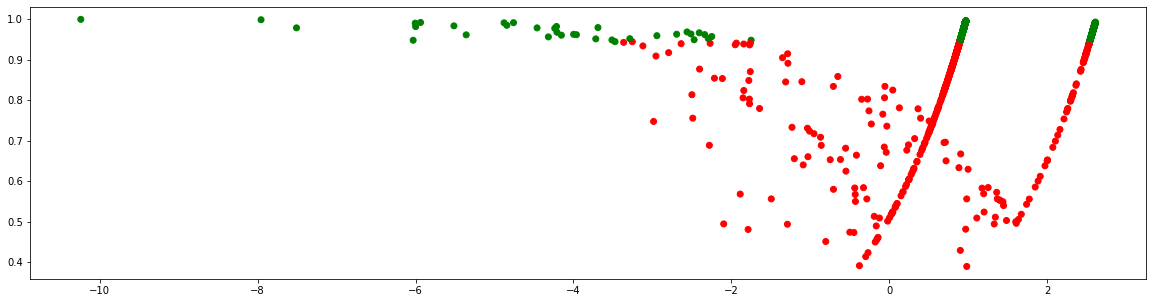

In [153]:
plot_scatter(x=merged_data["PVI"], y=merged_data["predicted_score"], to_colours=merged_data["filtering1"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=merged_data, x="PVI", y="predicted_score", colours="filtering1", hover_name="fever_id", hover_data=["claim", "fever_label", "predicted_label", "human_label"])

train

<Figure size 14400x9600 with 0 Axes>

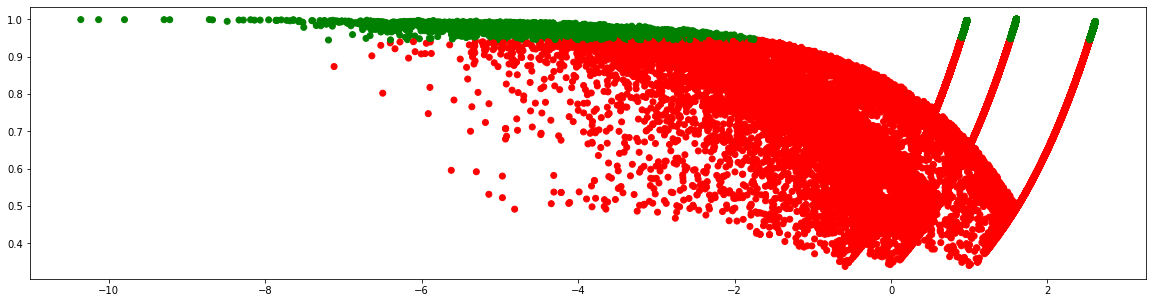

In [99]:
to_colour = train_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)
plot_scatter(x=train_data["PVI"], y=train_data["predicted_score"], to_colours=to_colour, figsize=(20,5))

In [51]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[35344 83606]
70.28667507356032


dev

<Figure size 14400x9600 with 0 Axes>

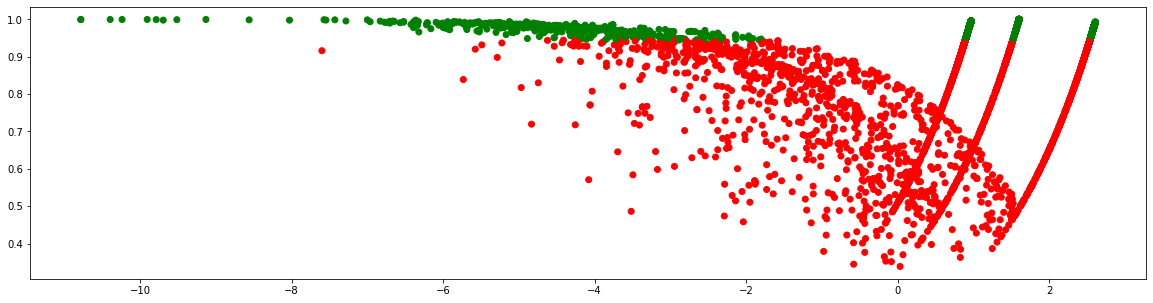

In [156]:
dev_data["filtering1"] = dev_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=dev_data["filtering1"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=dev_data, x="PVI", y="predicted_score", colours="filtering1", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [ ]:
plot_scatter_px(df=dev_data, x="PVI", y="predicted_score", colours="fever_label", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [ ]:
plot_scatter_px(df=dev_data, x="PVI", y="predicted_score", colours="predicted_label", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [101]:
unique, counts = np.unique(dev_data["filtering1"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[2318 5140]
68.91928130866184


test

<Figure size 14400x9600 with 0 Axes>

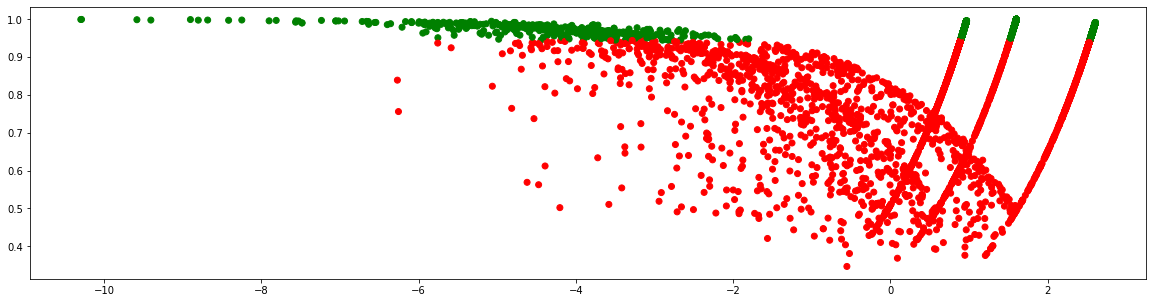

In [162]:
test_data["filtering1"] = test_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=test_data["filtering1"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=test_data, x="PVI", y="predicted_score", colours="filtering1", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [55]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[2506 5014]
66.67553191489361


⬇️ Filtering #2 (filters data points where predicted label does not equals FEVER label and the predicted score is below a given threshold values)

In [164]:
THRESHOLD_2 = 0.9915360331990829

train

<Figure size 14400x9600 with 0 Axes>

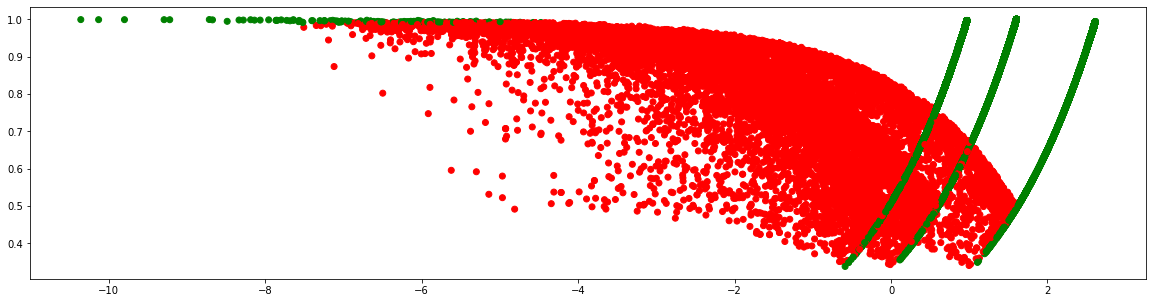

In [165]:
train_data["filtering2"] = train_data.apply(lambda x, threshold : x.predicted_score > threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_2)
plot_scatter(x=train_data["PVI"], y=train_data["predicted_score"], to_colours=train_data["filtering2"], figsize=(20,5))

In [166]:
unique, counts = np.unique(train_data["filtering2"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[ 14617 104333]
87.71164354770912


dev

<Figure size 14400x9600 with 0 Axes>

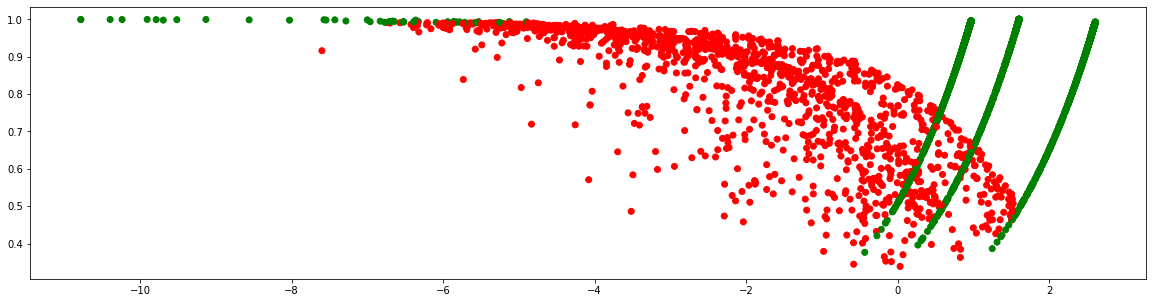

In [167]:
dev_data["filtering2"] = dev_data.apply(lambda x, threshold : x.predicted_score > threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_2)
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=dev_data["filtering2"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=dev_data, x="PVI", y="predicted_score", colours="filtering2", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [169]:
unique, counts = np.unique(dev_data["filtering2"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1322 6136]
82.27406811477607


test

<Figure size 14400x9600 with 0 Axes>

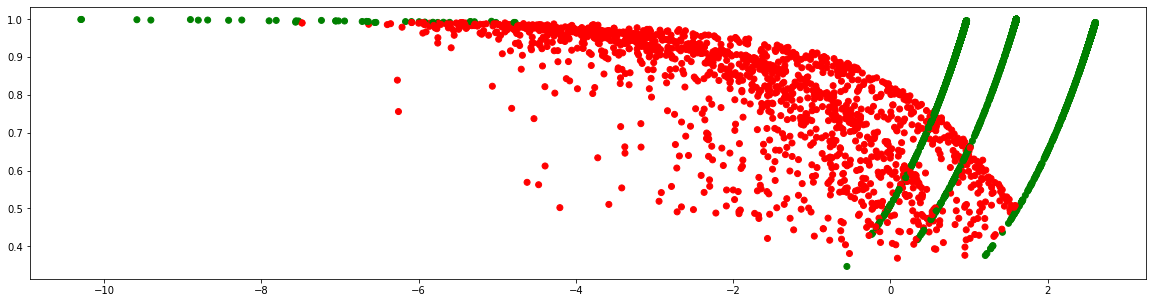

In [171]:
test_data["filtering2"] = test_data.apply(lambda x, threshold : x.predicted_score > threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_2)
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=test_data["filtering2"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=test_data, x="PVI", y="predicted_score", colours="filtering2", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [173]:
unique, counts = np.unique(test_data["filtering2"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1466 6054]
80.50531914893617


⬇️ Filtering #3 - Bertík (filters data points where the predicted label is not the same as FEVER label and where the predicted score is higher than a given threshold)

In [174]:
THRESHOLD_3 = 0.2366610981446108

train

<Figure size 14400x9600 with 0 Axes>

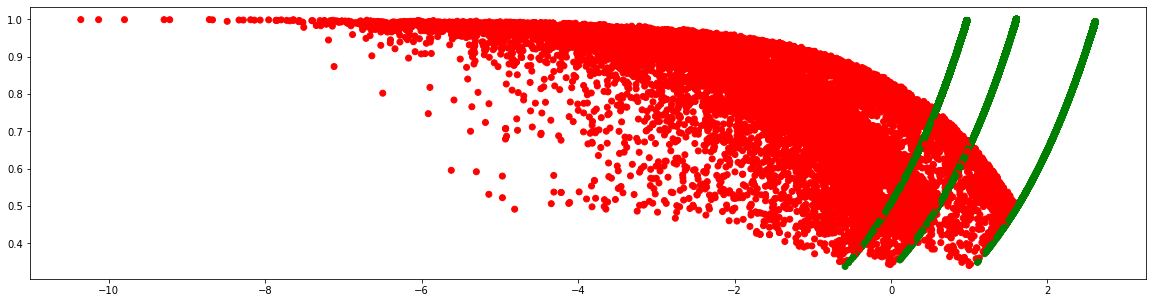

In [176]:
train_data["filtering3"] = train_data.apply(lambda x, threshold : x.predicted_score < threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_3)
plot_scatter(x=train_data["PVI"], y=train_data["predicted_score"], to_colours=train_data["filtering3"], figsize=(20,5))

In [177]:
unique, counts = np.unique(train_data["filtering3"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[ 14774 104176]
87.57965531736023


dev

<Figure size 14400x9600 with 0 Axes>

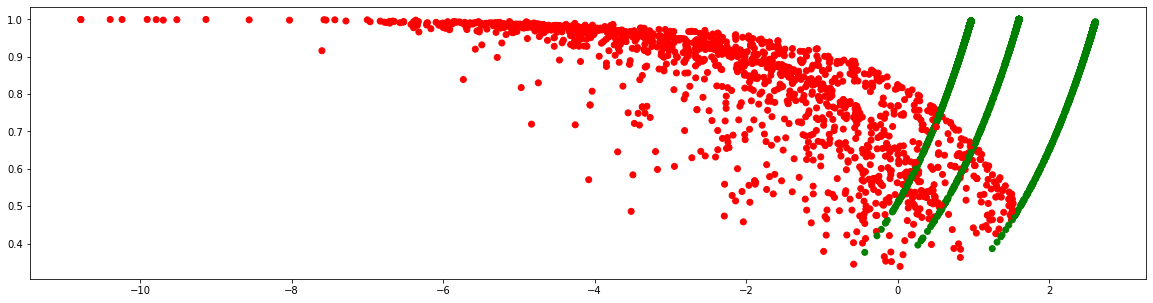

In [178]:
dev_data["filtering3"] = dev_data.apply(lambda x, threshold : x.predicted_score < threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_3)
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=dev_data["filtering3"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=dev_data, x="PVI", y="predicted_score", colours="filtering3", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [182]:
unique, counts = np.unique(dev_data["filtering3"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1370 6088]
81.63046393134888


test

<Figure size 14400x9600 with 0 Axes>

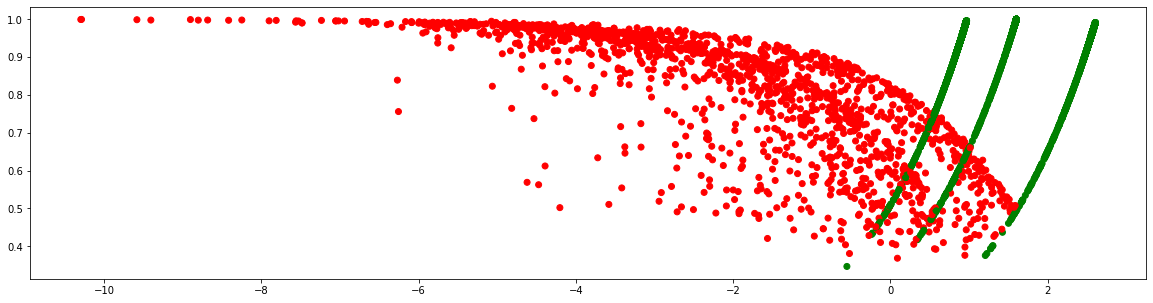

In [183]:
test_data["filtering3"] = test_data.apply(lambda x, threshold : x.predicted_score < threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_3)
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=test_data["filtering3"], figsize=(20,5))

In [ ]:
plot_scatter_px(df=test_data, x="PVI", y="predicted_score", colours="filtering3", hover_name="id", hover_data=["claim", "fever_label", "predicted_label"])

In [185]:
unique, counts = np.unique(test_data["filtering3"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1505 6015]
79.98670212765957


## PVI Filtering

In [30]:
from datasets import Dataset, DatasetDict

train

<Figure size 15360x11520 with 0 Axes>

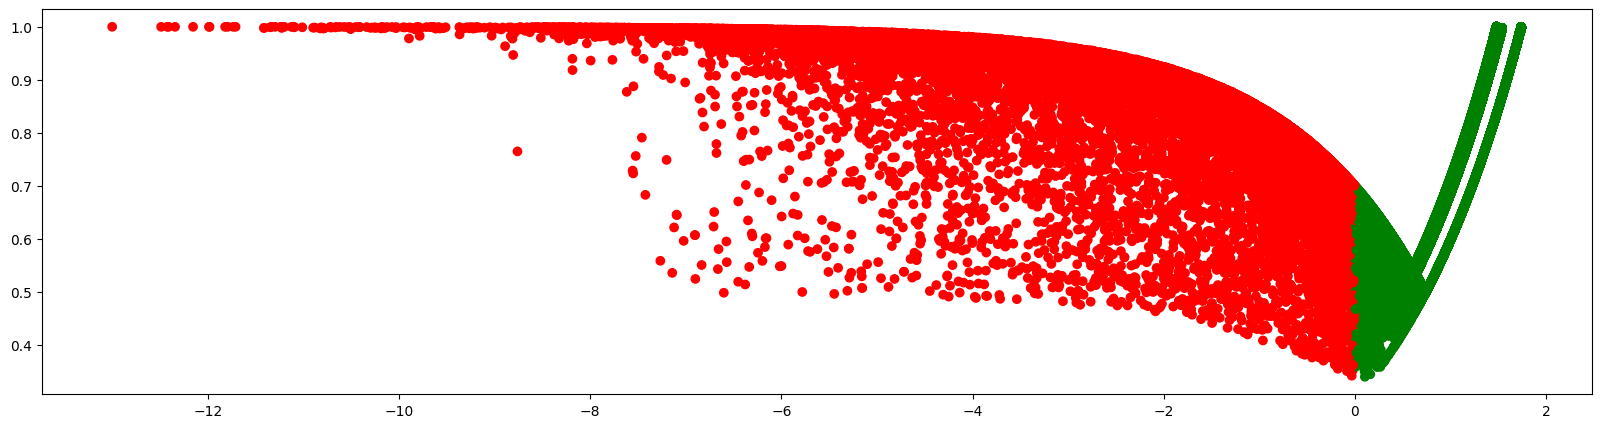

In [31]:
train_data["pvi_filtering"] = train_data.apply(lambda x, threshold : x.PVI > threshold, axis=1, threshold=0)
plot_scatter(x=train_data["PVI"], y=train_data["predicted_score"], to_colours=train_data["pvi_filtering"], figsize=(20,5))

In [32]:
unique, counts = np.unique(train_data["pvi_filtering"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[ 23400 271809]
92.07341239596354


dev

<Figure size 15360x11520 with 0 Axes>

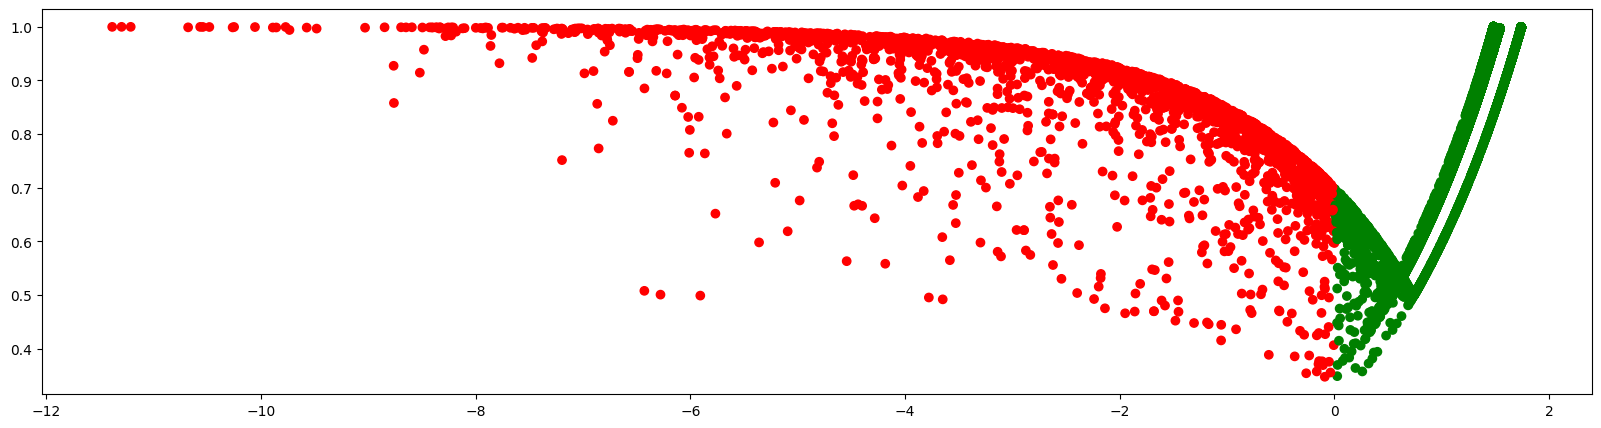

In [33]:
dev_data["pvi_filtering"] = dev_data.apply(lambda x, threshold : x.PVI > threshold, axis=1, threshold=0)
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=dev_data["pvi_filtering"], figsize=(20,5))

In [34]:
unique, counts = np.unique(dev_data["pvi_filtering"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[ 2495 25945]
91.22714486638537


test

<Figure size 15360x11520 with 0 Axes>

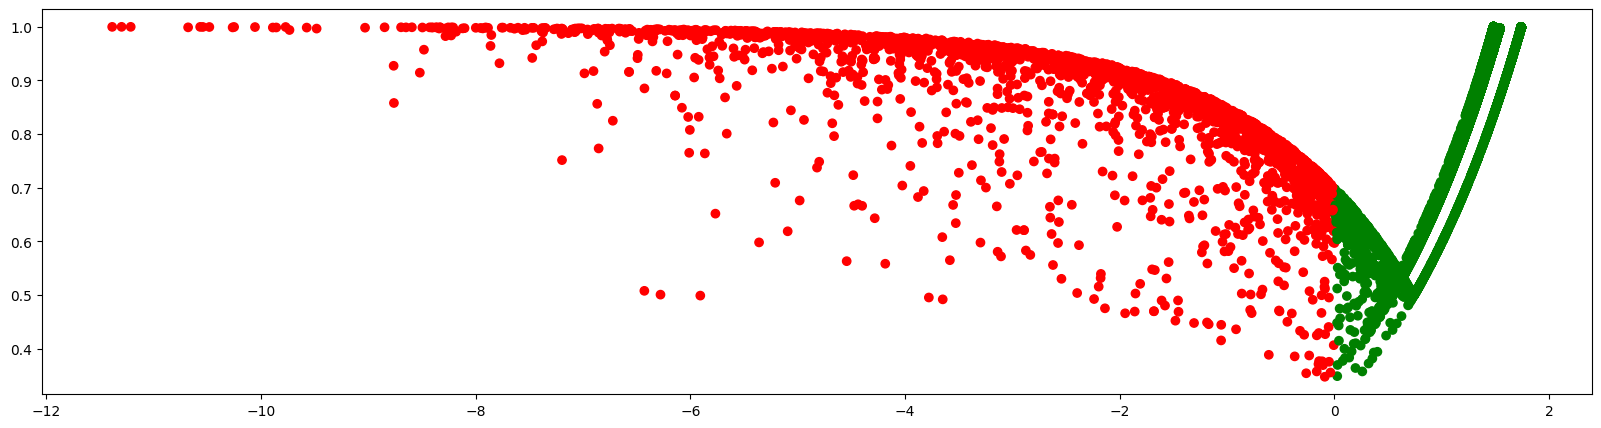

In [35]:
test_data["pvi_filtering"] = test_data.apply(lambda x, threshold : x.PVI > threshold, axis=1, threshold=0)
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=test_data["pvi_filtering"], figsize=(20,5))

In [36]:
unique, counts = np.unique(test_data["pvi_filtering"].to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[ 2495 25945]
91.22714486638537


### transform to HF datasets

In [37]:
train_data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,pvi_filtering
0,0,Dr. Milan Uhde mluvil s studenty na řečkovické...,Gymnázium Brno-Řečkovice Druhým tradičním způ...,2,Dr. Milan Uhde mluvil s studenty na řečkovické...,Gymnázium Brno-Řečkovice Druhým tradičním způ...,1.482131,0.000152,True,2,0.999895,1.481979,True
1,1,Richard Biegel se narodil v Praze.,Richard Biegel Od roku 1996 se věnuje aktivní...,2,Richard Biegel se narodil v Praze.,Richard Biegel Od roku 1996 se věnuje aktivní...,1.482131,0.000265,True,2,0.999816,1.481866,True
2,2,Izaiáš byl vězněn uvnitř Novosadské synagogy.,Novosadská synagoga Novosadská synagoga je v ...,1,Izaiáš byl vězněn uvnitř Novosadské synagogy.,Novosadská synagoga Novosadská synagoga je v ...,1.741473,0.001542,True,1,0.998932,1.739931,True
3,3,Oficiální název Guamu je Guåhån.,Guam Možná hledáte: GUAM – mezinárodní organi...,1,Oficiální název Guamu je Guåhån.,Guam Možná hledáte: GUAM – mezinárodní organi...,1.741473,0.032056,True,1,0.978026,1.709418,True
4,4,Svatý otec navštívil Kubu v březnu 2012.,Rakouská iniciativa kněží Ve Výzvě např. proh...,0,Svatý otec navštívil Kubu v březnu 2012.,Rakouská iniciativa kněží Ve Výzvě např. proh...,1.543819,0.018859,True,0,0.987013,1.524961,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295204,295204,Rok 1913 začal středou.,"1913 1913 (MCMXIII) byl rok, který dle gregor...",0,Rok 1913 začal středou.,"1913 1913 (MCMXIII) byl rok, který dle gregor...",1.543819,0.027178,True,0,0.981338,1.516642,True
295205,295205,Občina Kanal ob Soči se nachází v gorickém reg...,Občina Kanal ob Soči Občina Kanal ob Soči (v ...,0,Občina Kanal ob Soči se nachází v gorickém reg...,Občina Kanal ob Soči Občina Kanal ob Soči (v ...,1.543819,0.017373,True,0,0.988030,1.526447,True
295206,295206,Linton spolupracoval s Rodertem Redfieldem na ...,Ralph Linton Ralph Linton (27. února 1893 Fil...,2,Linton spolupracoval s Rodertem Redfieldem na ...,Ralph Linton Ralph Linton (27. února 1893 Fil...,1.482131,0.000153,True,2,0.999894,1.481978,True
295207,295207,Dům čp. 325 se nachází v okrese Nový Jičín.,Dům čp. 325 (Štramberk) Stavební podoba. Dům...,2,Dům čp. 325 se nachází v okrese Nový Jičín.,Dům čp. 325 (Štramberk) Stavební podoba. Dům...,1.482131,0.006951,True,2,0.995193,1.475180,True


### sort values (Imitating Curriculum Learning)

In [38]:
train_data = train_data.sort_values("PVI")
dev_data = dev_data.sort_values("PVI")
test_data = test_data.sort_values("PVI")

In [39]:
test_data

,Unnamed: 0,claim,evidence,label,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,pvi_filtering
19455,19455,Divadlo Rocky bylo uvedeno v roce 2007.,Tomáš Jeřábek (herec) Tomáš Jeřábek (* 24. zá...,0,Divadlo Rocky bylo uvedeno v roce 2007.,Tomáš Jeřábek (herec) Tomáš Jeřábek (* 24. zá...,1.543819,12.931658,False,2,0.999751,-11.387838,False
27487,27487,Sergej Sergejevič Alexandrovskij byl v roce 19...,Sergej Sergejevič Alexandrovskij Manželka vel...,0,Sergej Sergejevič Alexandrovskij byl v roce 19...,Sergej Sergejevič Alexandrovskij Manželka vel...,1.543819,12.844219,False,2,0.999799,-11.300400,False
12720,12720,Petráček byl jmenován postgraduálním vikářem.,Tomáš Petráček Absolvoval studijní pobyty na ...,0,Petráček byl jmenován postgraduálním vikářem.,Tomáš Petráček Absolvoval studijní pobyty na ...,1.543819,12.759012,False,2,0.999802,-11.215193,False
6776,6776,Kleopatra byla Caesarovým bratrem.,Arsinoé IV. Zajetí. Po porážce Caesar povola...,2,Kleopatra byla Caesarovým bratrem.,Arsinoé IV. Zajetí. Po porážce Caesar povola...,1.482131,12.162476,False,1,0.998874,-10.680345,False
11307,11307,Giuseppe Garibaldi byl kapitánem lodi USS Cali...,Giuseppe Garibaldi (551) Pohonný systém je ko...,0,Giuseppe Garibaldi byl kapitánem lodi USS Cali...,Giuseppe Garibaldi (551) Pohonný systém je ko...,1.543819,12.111917,False,2,0.999703,-10.568098,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28105,28105,V roce 1549 byl jmenován královským typografem.,"Christophe Plantin Christophe Plantin [""chris...",1,V roce 1549 byl jmenován královským typografem.,"Christophe Plantin Christophe Plantin [""chris...",1.741473,0.001348,True,1,0.999066,1.740125,True
14656,14656,Replika vodotěžního zařízení byla vyrobena 16....,Poštovní štola V podzemí jsou dochovány části...,1,Replika vodotěžního zařízení byla vyrobena 16....,Poštovní štola V podzemí jsou dochovány části...,1.741473,0.001347,True,1,0.999067,1.740126,True
13480,13480,Severní a západní část Medzibodrockých pláňava...,Medzibodrocké pláňavy Medzibodrocké pláňavy j...,1,Severní a západní část Medzibodrockých pláňava...,Medzibodrocké pláňavy Medzibodrocké pláňavy j...,1.741473,0.001344,True,1,0.999069,1.740129,True
1215,1215,Film Die Augen der Ica Vilander byl natočen 20...,Ica Vilander Ica Vilander (* 20. prosince 192...,1,Film Die Augen der Ica Vilander byl natočen 20...,Ica Vilander Ica Vilander (* 20. prosince 192...,1.741473,0.001342,True,1,0.999070,1.740131,True


### Convert

In [40]:
train_df = train_data[train_data.pvi_filtering].filter(items=["id", "claim", "evidence", "label"])

In [41]:
dev_df = dev_data[dev_data.pvi_filtering].filter(items=["id", "claim", "evidence", "label"])

In [42]:
test_df = test_data[test_data.pvi_filtering].filter(items=["id", "claim", "evidence", "label"])

In [43]:
train_hf = Dataset.from_pandas(train_df)
dev_hf = Dataset.from_pandas(dev_df)
test_hf = Dataset.from_pandas(test_df)

In [44]:
dataset = DatasetDict()
dataset["train"] = train_hf
dataset["validation"] = dev_hf
dataset["test"] = test_hf

In [45]:
dataset = dataset.remove_columns("__index_level_0__")

In [46]:
dataset

DatasetDict({
    train: Dataset({
        features: ['claim', 'evidence', 'label'],
        num_rows: 271809
    })
    validation: Dataset({
        features: ['claim', 'evidence', 'label'],
        num_rows: 25945
    })
    test: Dataset({
        features: ['claim', 'evidence', 'label'],
        num_rows: 25945
    })
})

In [47]:
dataset.save_to_disk("/home/mlynatom/data/cs_fever/PVI-generated")

Saving the dataset (0/1 shards):   0%|          | 0/271809 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/25945 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/25945 [00:00<?, ? examples/s]

### Push to hub

In [32]:
from datasets import load_from_disk

In [33]:
dataset = load_from_disk("/home/mlynatom/data/cs_fever/PVI-filtered")

In [34]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'claim', 'evidence', 'label'],
        num_rows: 106209
    })
    validation: Dataset({
        features: ['id', 'claim', 'evidence', 'label'],
        num_rows: 6319
    })
    test: Dataset({
        features: ['id', 'claim', 'evidence', 'label'],
        num_rows: 6261
    })
})

In [35]:
dataset.push_to_hub("ctu-aic/csfever_v2_pvi")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/3 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/36 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/36 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/36 [00:00<?, ?ba/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]